# Lab 01a

## 1 Classification with a single-layer perceptron


#### 1.1 Generation of linearly-separable data

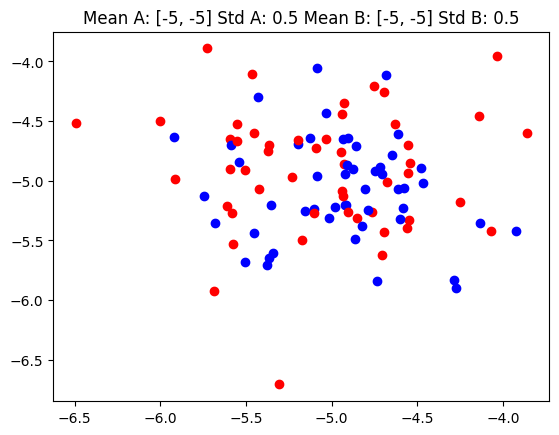

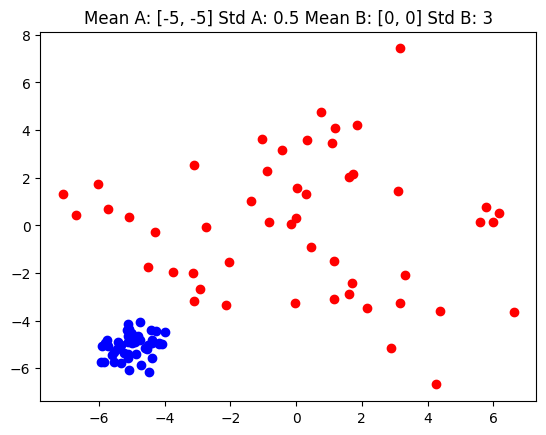

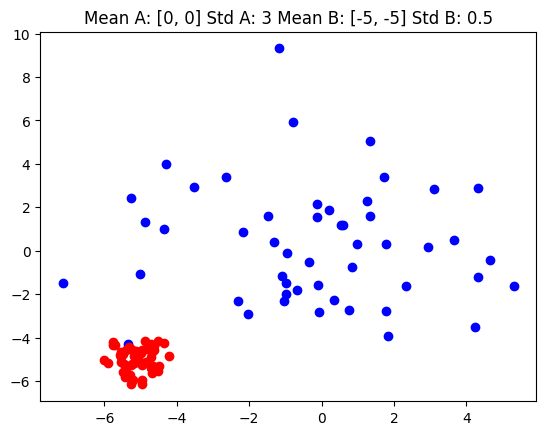

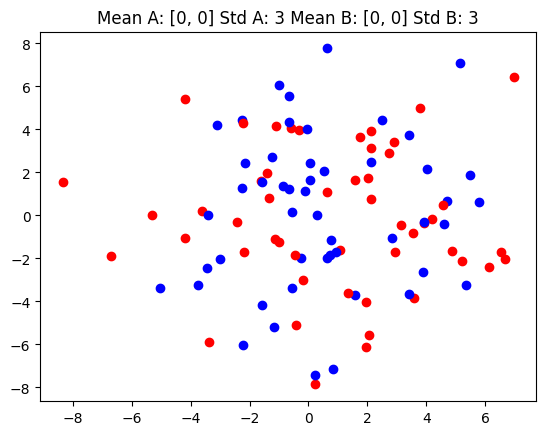

In [61]:
import data_points as dp
import numpy as np

listOfMeans = [[-5, -5], [0, 0], [5, 5]]
listOfStd = [0.5, 3]

for(meanA, stdA) in zip(listOfMeans, listOfStd):
    for(meanB, stdB) in zip(listOfMeans, listOfStd):
        points1 = dp.generate_points_normal(50, meanA, stdA, 0)
        points2= dp.generate_points_normal(50, meanB, stdB, 1)

        points = points1 + points2

        points_shuffled = dp.shuffle_points(points)
        title = "Mean A: " + str(meanA) + " Std A: " + str(stdA) + " Mean B: " + str(meanB) + " Std B: " + str(stdB)
        dp.plot_points_2d(points, title)
    







#### 1.2 Classification with a single-layer perceptron and analysis

First let's generate some points for perceptron rule

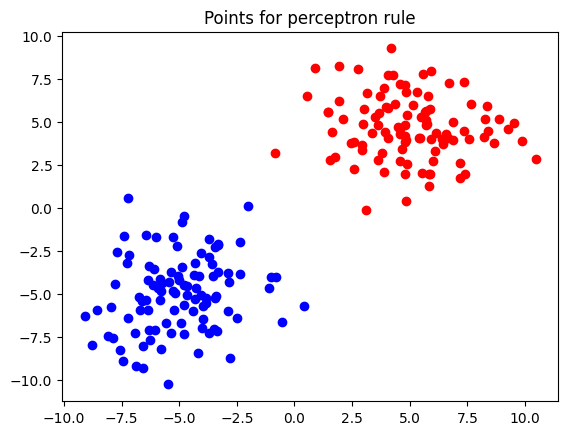

In [62]:
from module import SingleLayerPerceptron

pointsA = dp.generate_points_normal(100, [5, 5], 2, 1)
pointsB = dp.generate_points_normal(100, [-5, -5], 2, 0)

points = pointsA + pointsB

points_shuffled = dp.shuffle_points(points)

dp.plot_points_2d(points_shuffled, "Points for perceptron rule")

let's train our perceptron in on-line sequantial mode,

Epoch 1, Loss: 3


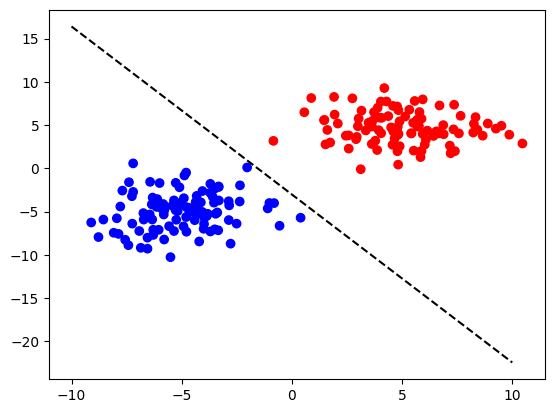

Epoch 2, Loss: 0


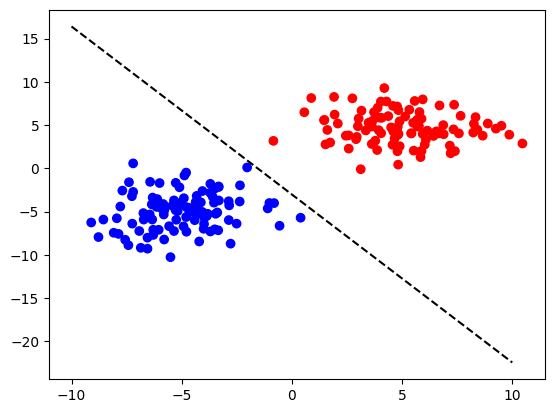

Epoch 3, Loss: 0


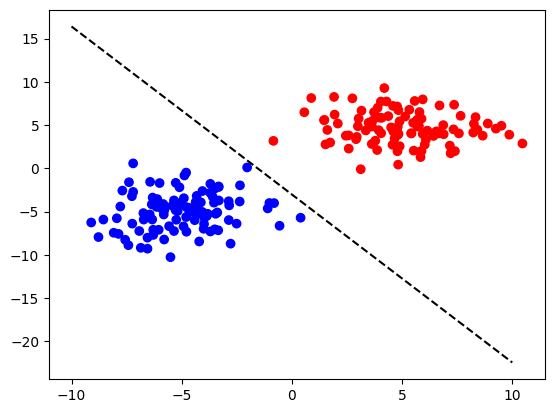

Epoch 4, Loss: 0


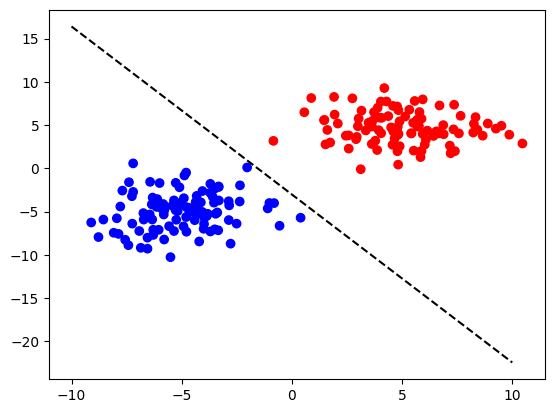

Epoch 5, Loss: 0


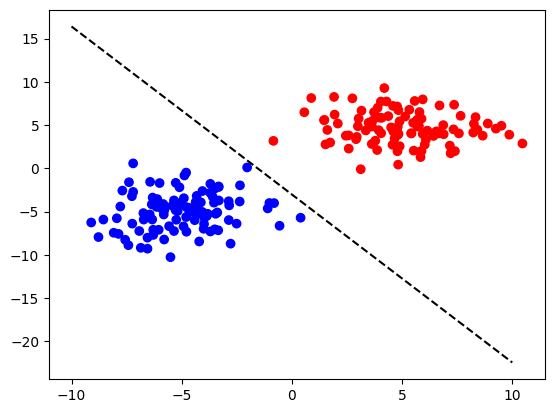

Epoch 6, Loss: 0


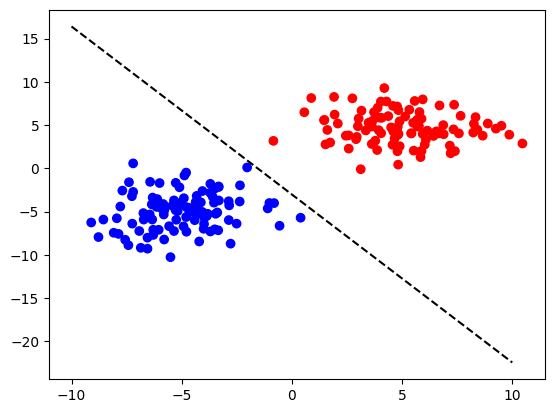

Epoch 7, Loss: 0


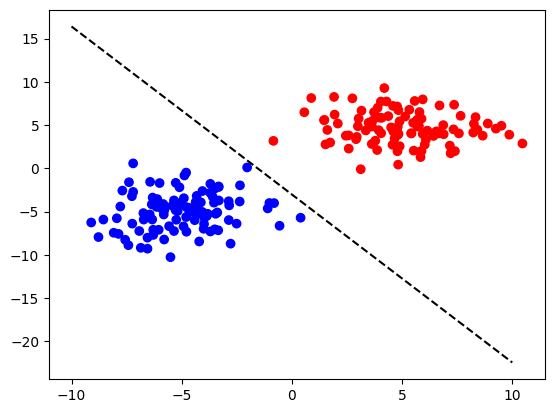

Epoch 8, Loss: 0


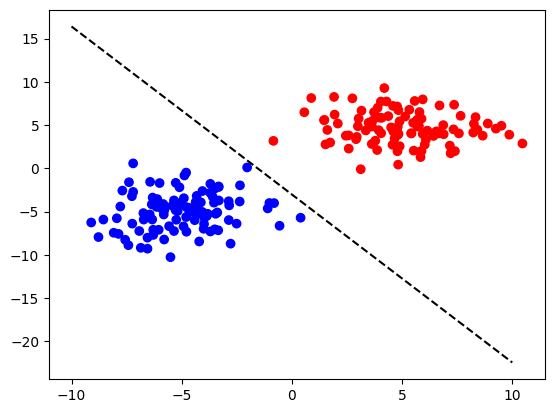

Epoch 9, Loss: 0


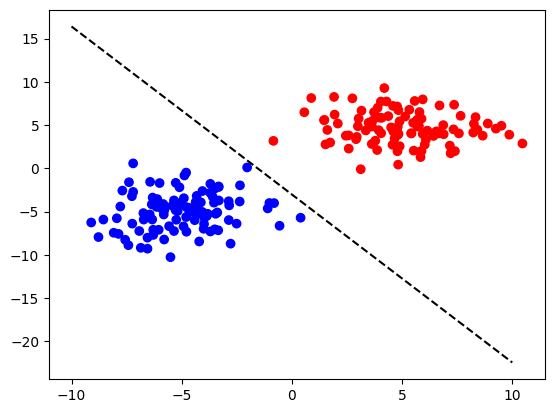

Epoch 10, Loss: 0


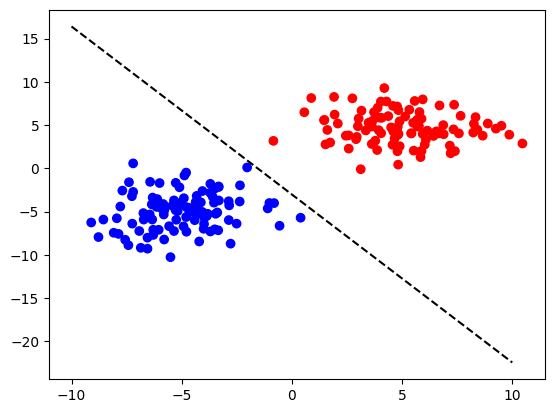

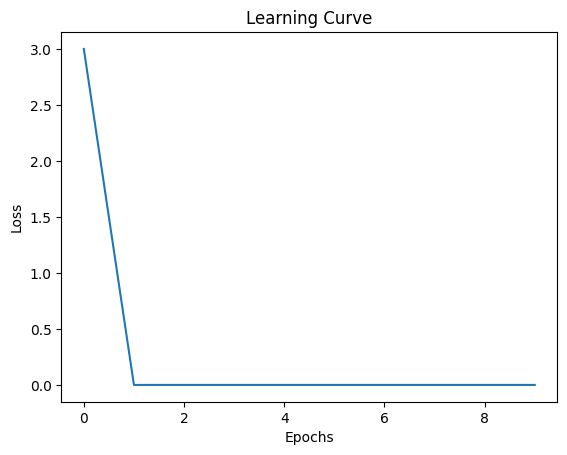

In [63]:
perceptron = SingleLayerPerceptron(2)

X = np.array([point[0] for point in points_shuffled])
y = np.array([point[1] for point in points_shuffled])

perceptron.sequential_train(X, y, lr=0.1, method="perceptron", epochs=10, visualize=True)

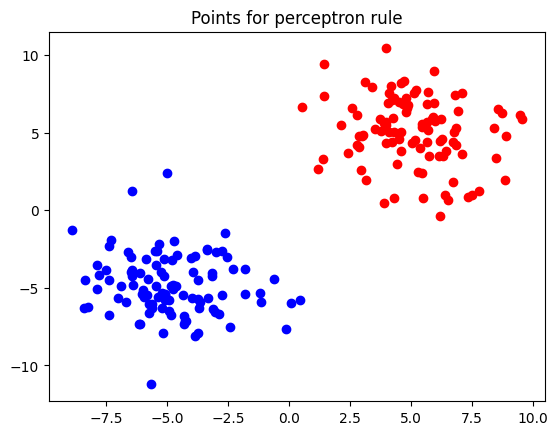

In [64]:
pointsAD = dp.generate_points_normal(100, [5, 5], 2, 1)
pointsBD = dp.generate_points_normal(100, [-5, -5], 2, -1)

pointsD = pointsAD + pointsBD

points_shuffledD = dp.shuffle_points(pointsD)

dp.plot_points_2d(points_shuffledD, "Points for perceptron rule")

Epoch 1, Loss: 50


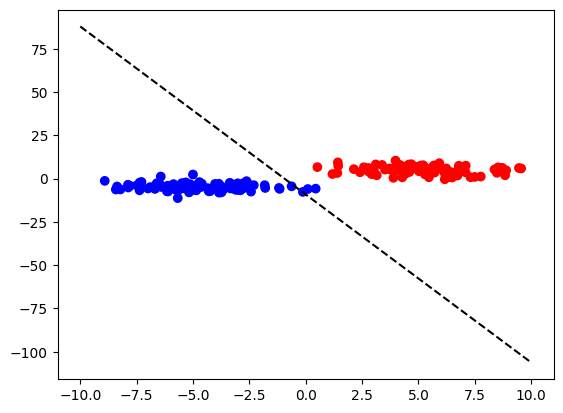

Epoch 2, Loss: 50


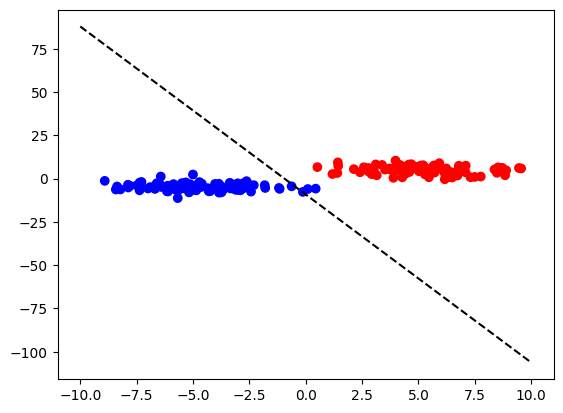

Epoch 3, Loss: 50


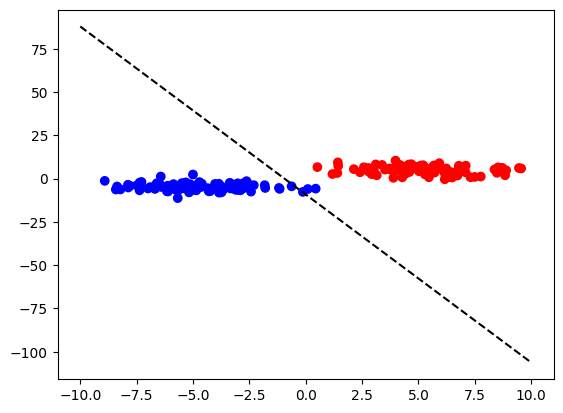

Epoch 4, Loss: 50


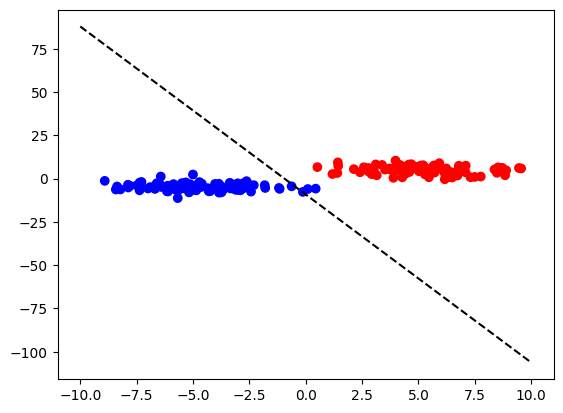

Epoch 5, Loss: 50


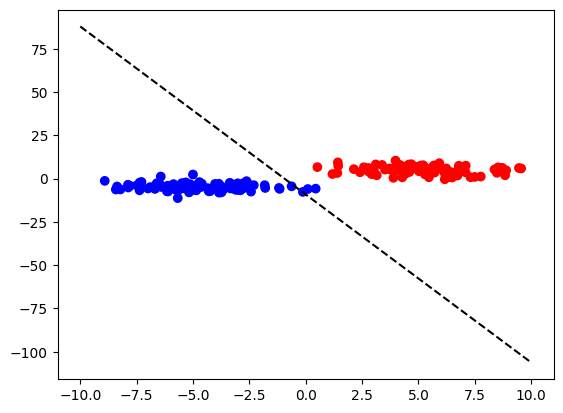

Epoch 6, Loss: 50


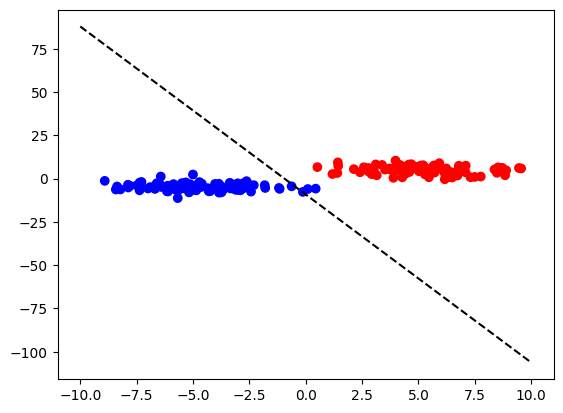

Epoch 7, Loss: 50


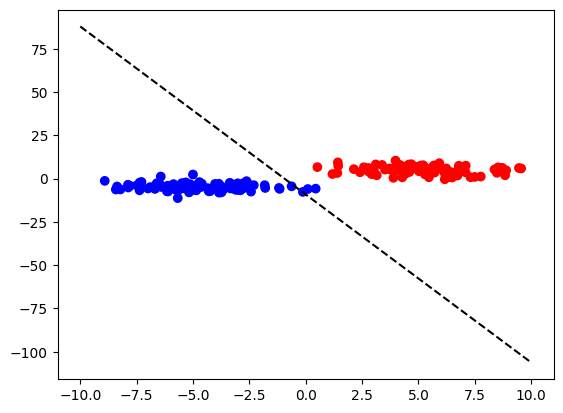

Epoch 8, Loss: 50


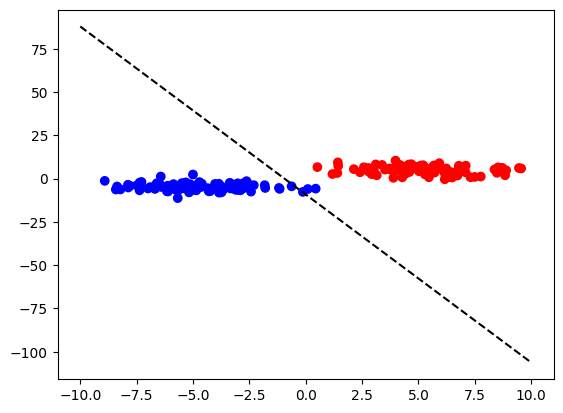

Epoch 9, Loss: 50


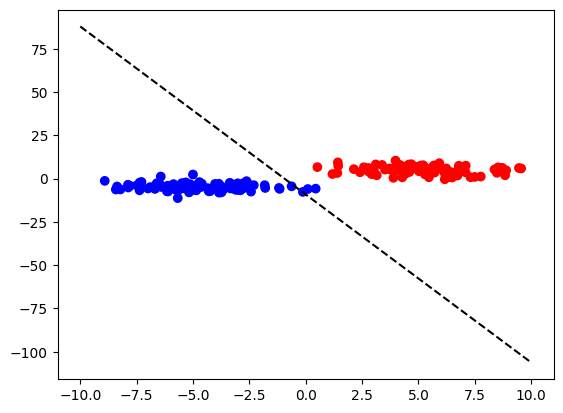

Epoch 10, Loss: 50


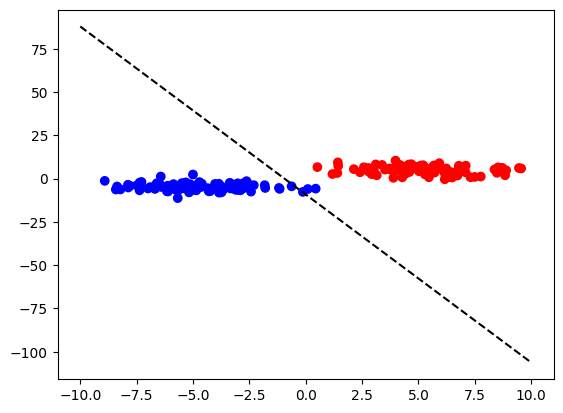

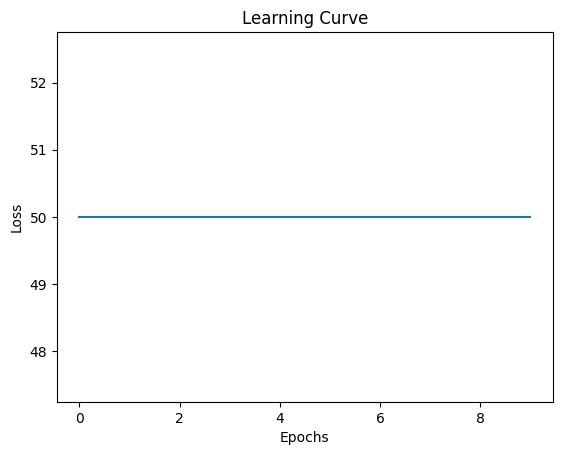

In [65]:
perceptron_delta = SingleLayerPerceptron(2)

X = np.array([point[0] for point in points_shuffledD])
y = np.array([point[1] for point in points_shuffledD])

perceptron_delta.sequential_train(X, y, lr=0.1, method="delta", epochs=10, visualize=True)

#### 1.3 Classification of samples that are not linearly separable

We will have 3 sets, one that has only few points that are not linearly separable, one that has more points that are not linearly separable and one that has a lot of points that are not linearly separable.

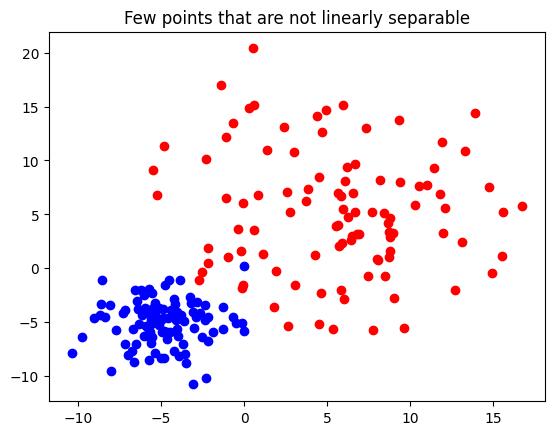

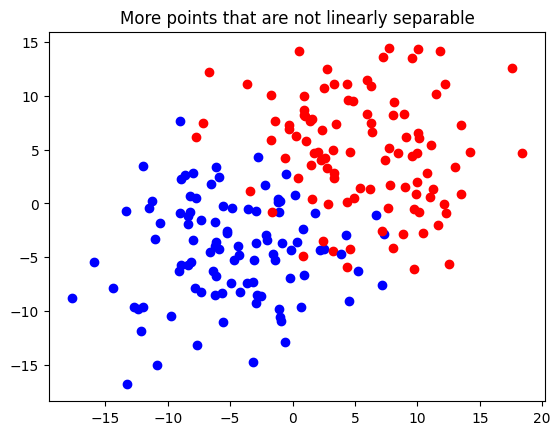

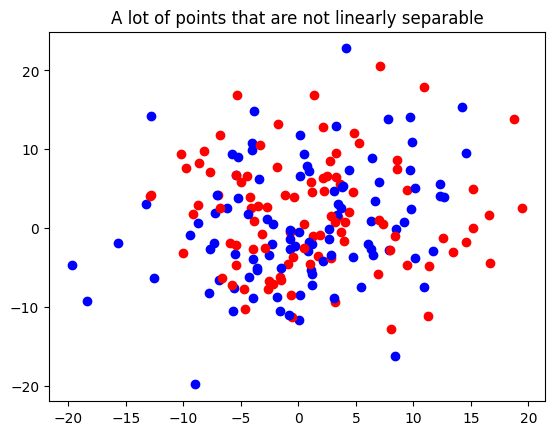

In [66]:
import data_points as dp
import numpy as np

# Configuration for different point sets
configurations = [
    ([-5, -5], [5, 5], 2, 5, 100, "Few points that are not linearly separable"),
    ([-5, -5], [5, 5], 5, 5, 100, "More points that are not linearly separable"),
    ([0, 0], [0, 0], 7, 7, 100, "A lot of points that are not linearly separable")
]

# Loop through configurations to generate, shuffle, and plot points
for meanA, meanB, stdA, stdB, n_points, plot_title in configurations:
    pointsA = dp.generate_points_normal(n_points, meanA, stdA, 0)
    pointsB = dp.generate_points_normal(n_points, meanB, stdB, 1)
    points = pointsA + pointsB
    points_shuffled = dp.shuffle_points(points)
    dp.plot_points_2d(points_shuffled, plot_title)


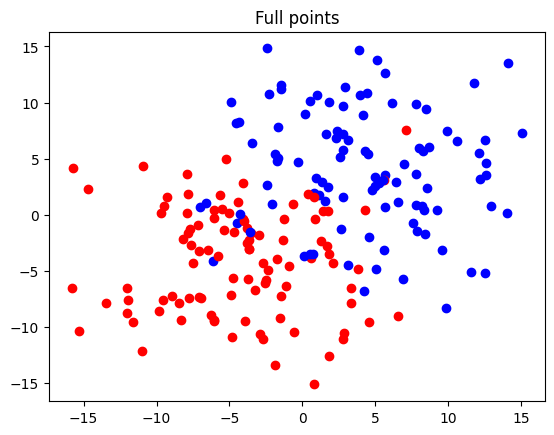

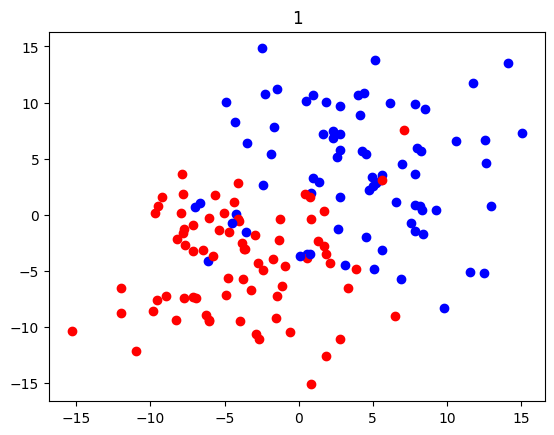

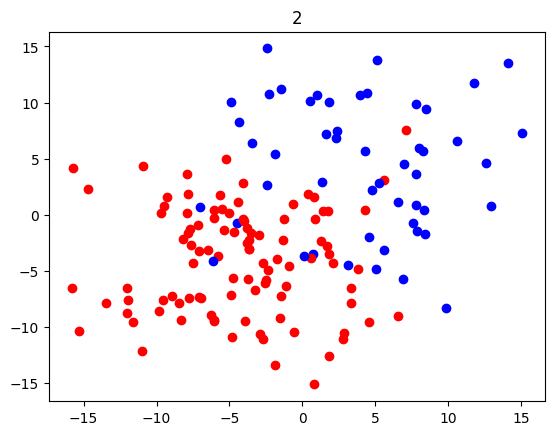

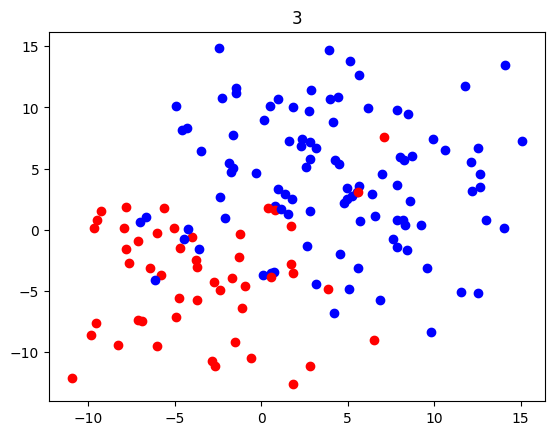

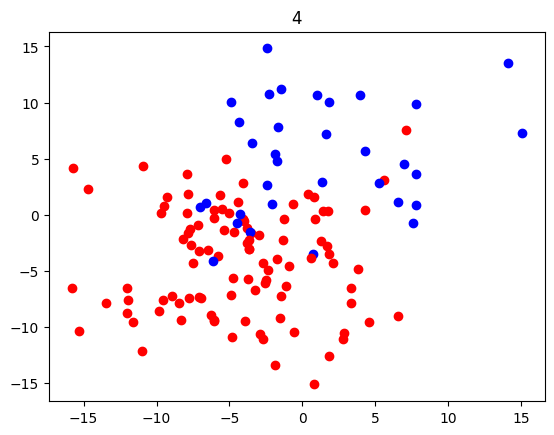

In [67]:
full_points_A = dp.generate_points_normal(100, [4, 4], 5, 0)
full_points_B = dp.generate_points_normal(100, [-4, -4], 5, 1)

#remove 25% of points from each set
pointsA_1 = full_points_A[:75]
pointsB_1 = full_points_B[:75]

#remove 50% of points from set A
pointsA_2 = full_points_A[:50]
pointsB_2 = full_points_B

#remove 50% of points from set B
pointsA_3 = full_points_A
pointsB_3 = full_points_B[:50]

# 20% from a subset of classA for which classA(1,:)<0 and 80% from a
#subset of classA for which classA(1,:)>0
pointsA_negative = [point for point in full_points_A if point[0][0] < 0]  # x < 0
pointsA_positive = [point for point in full_points_A if point[0][0] >= 0]  # x >= 0

# Remove 20% of points from the subset where x < 0
n_remove_negative = int(0.2 * len(pointsA_negative))
pointsA_negative = pointsA_negative[:len(pointsA_negative) - n_remove_negative]

# Remove 80% of points from the subset where x >= 0
n_remove_positive = int(0.8 * len(pointsA_positive))
pointsA_positive = pointsA_positive[:len(pointsA_positive) - n_remove_positive]

pointsA_4 = pointsA_negative + pointsA_positive
pointsB_4 = full_points_B



#final
full_points = dp.shuffle_points(full_points_A + full_points_B)
point_1 = dp.shuffle_points(pointsA_1 + pointsB_1)
point_2 = dp.shuffle_points(pointsA_2 + pointsB_2)
point_3 = dp.shuffle_points(pointsA_3 + pointsB_3)
point_4 = dp.shuffle_points(pointsA_4 + pointsB_4)

dp.plot_points_2d(full_points, "Full points")
dp.plot_points_2d(point_1, "1")
dp.plot_points_2d(point_2, "2")
dp.plot_points_2d(point_3, "3")
dp.plot_points_2d(point_4, "4")




Epoch 1, Loss: 72


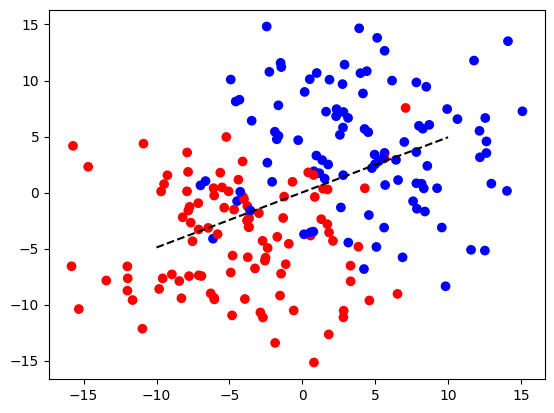

Epoch 2, Loss: 25


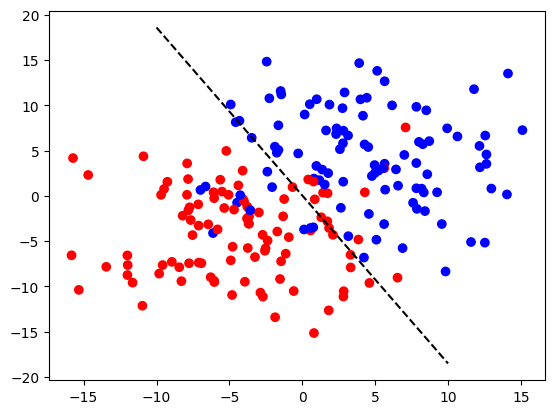

Epoch 3, Loss: 23


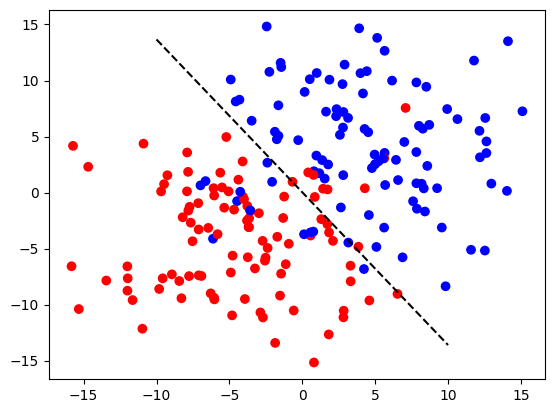

Epoch 4, Loss: 23


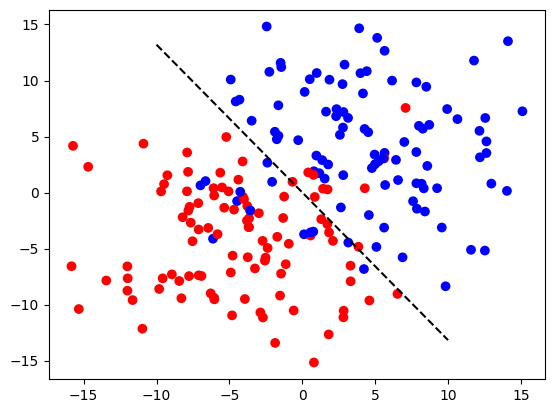

Epoch 5, Loss: 22


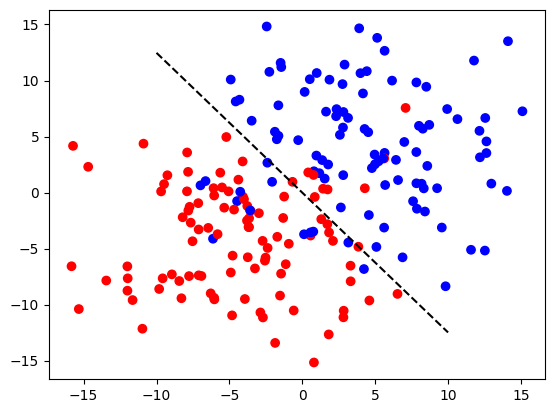

Epoch 6, Loss: 22


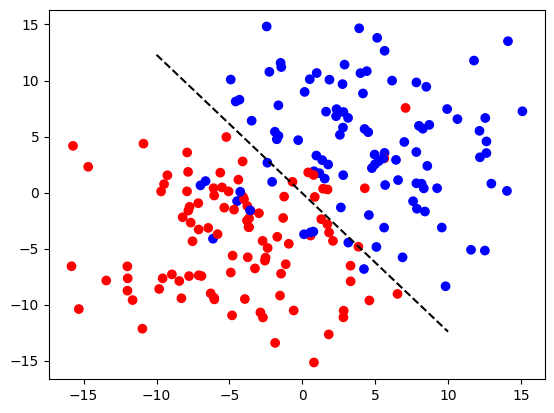

Epoch 7, Loss: 23


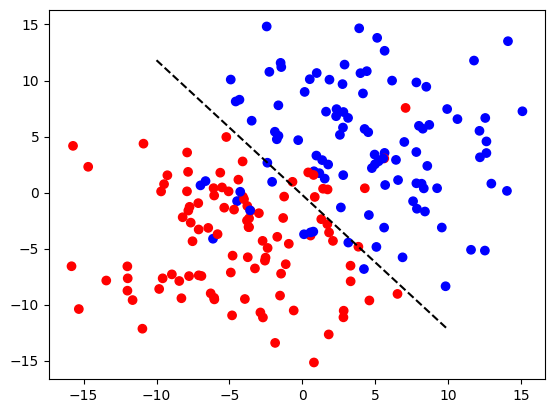

Epoch 8, Loss: 72


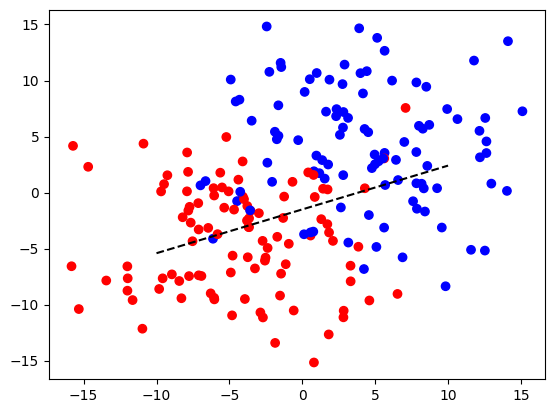

Epoch 9, Loss: 49


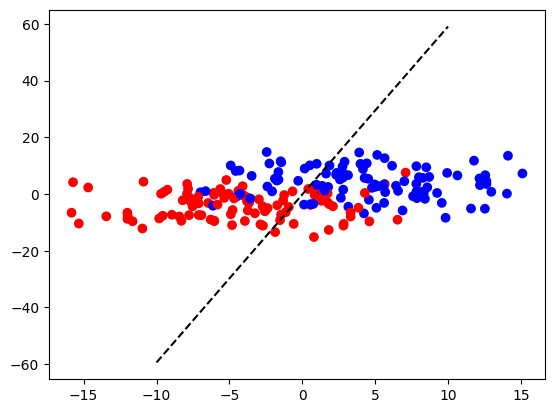

Epoch 10, Loss: 21


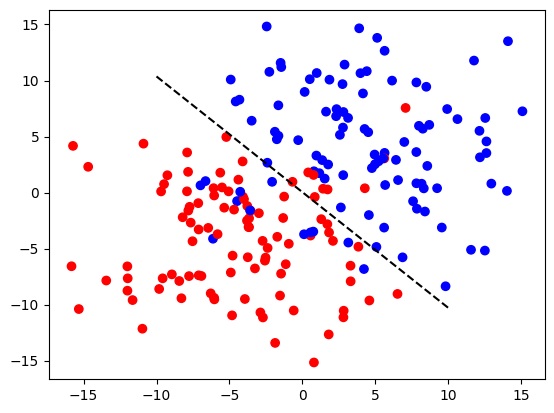

Epoch 11, Loss: 21


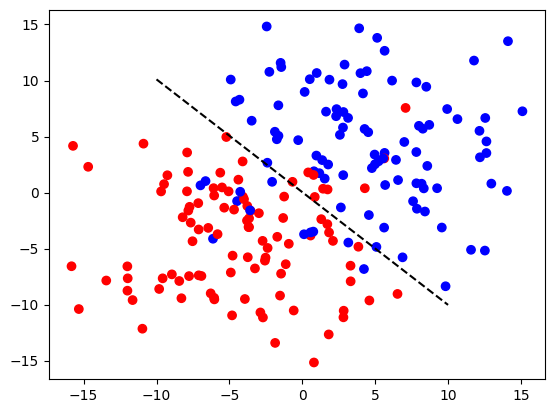

Epoch 12, Loss: 21


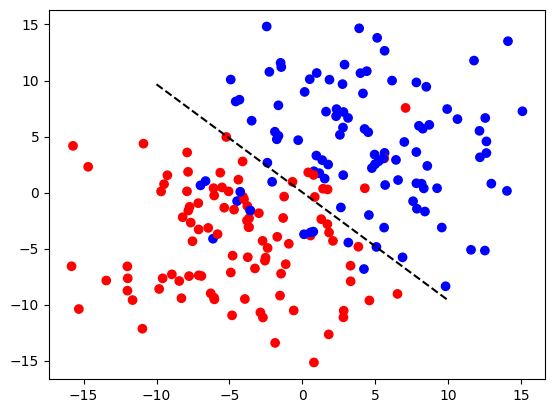

Epoch 13, Loss: 23


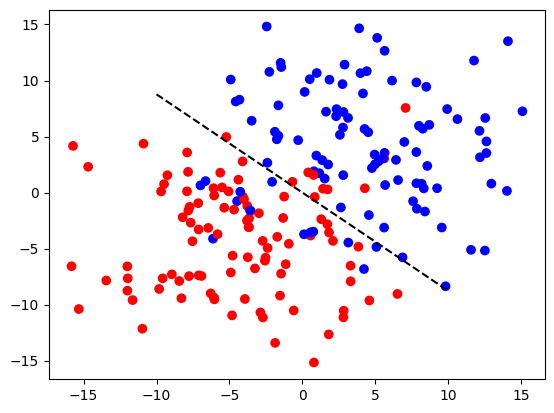

Epoch 14, Loss: 22


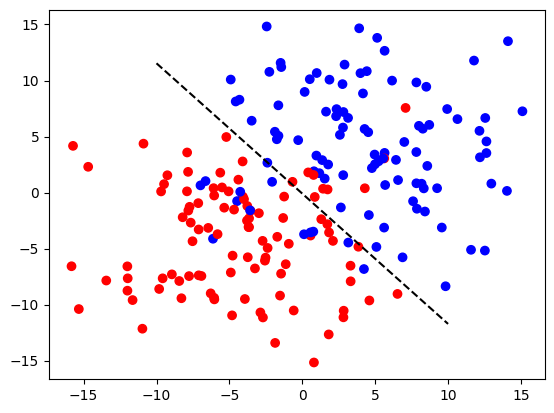

Epoch 15, Loss: 177


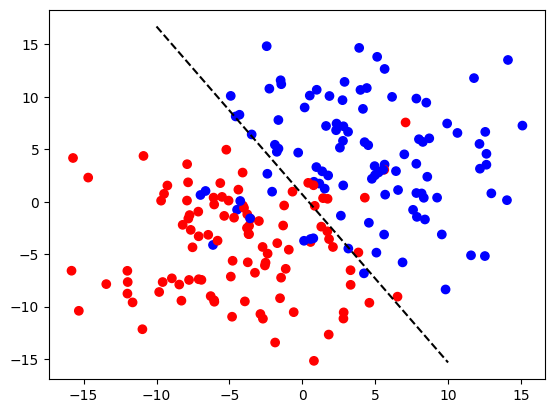

Epoch 16, Loss: 21


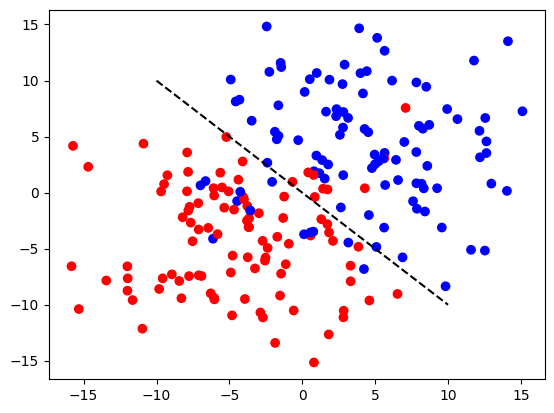

Epoch 17, Loss: 21


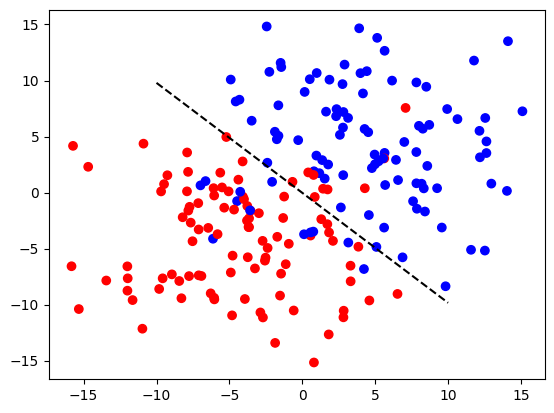

Epoch 18, Loss: 22


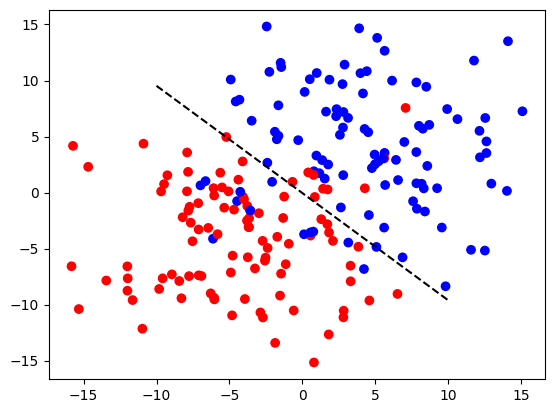

Epoch 19, Loss: 21


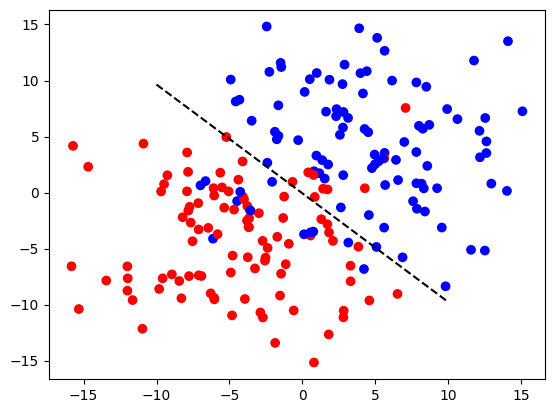

Epoch 20, Loss: 23


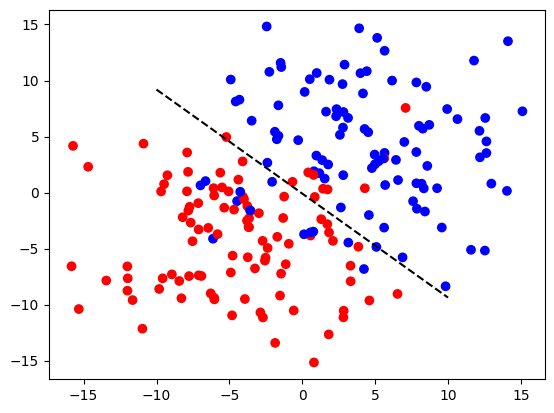

Epoch 21, Loss: 21


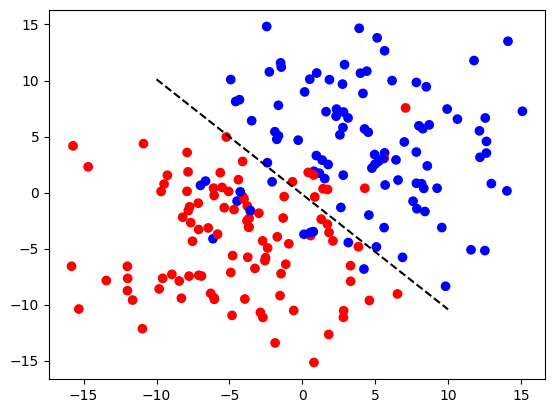

Epoch 22, Loss: 22


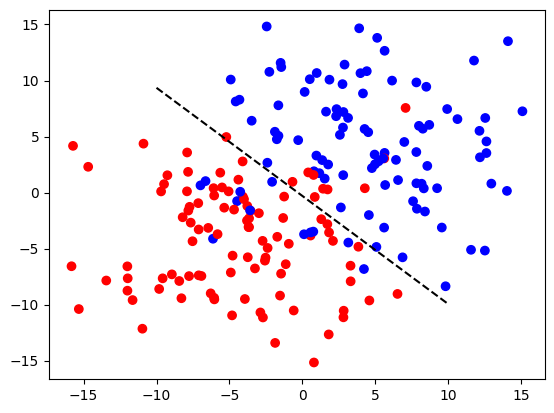

Epoch 23, Loss: 23


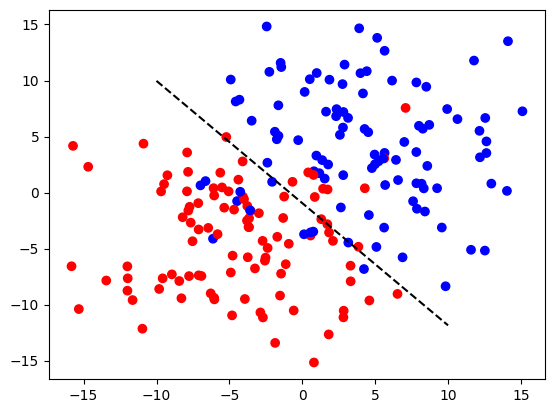

Epoch 24, Loss: 179


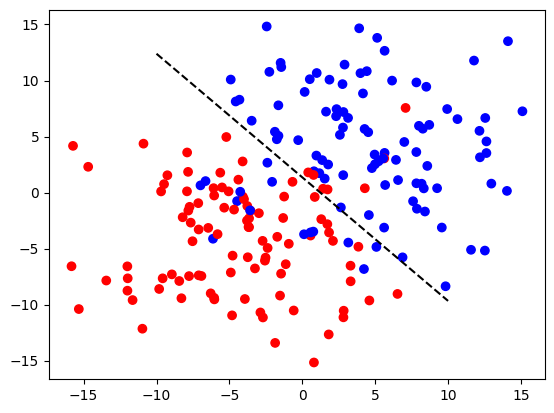

Epoch 25, Loss: 21


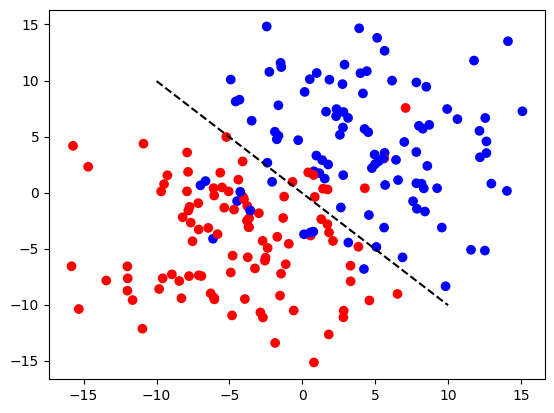

Epoch 26, Loss: 21


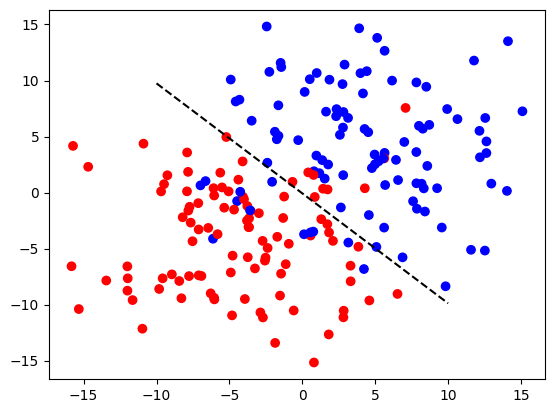

Epoch 27, Loss: 22


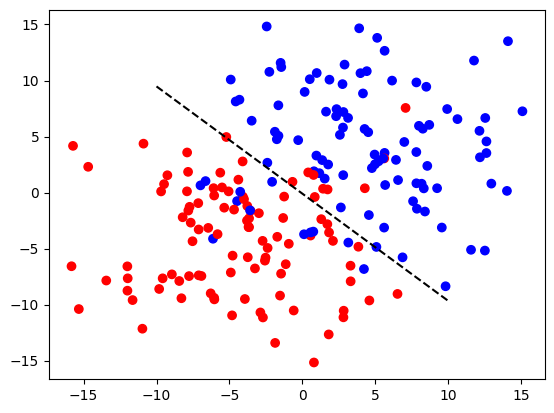

Epoch 28, Loss: 22


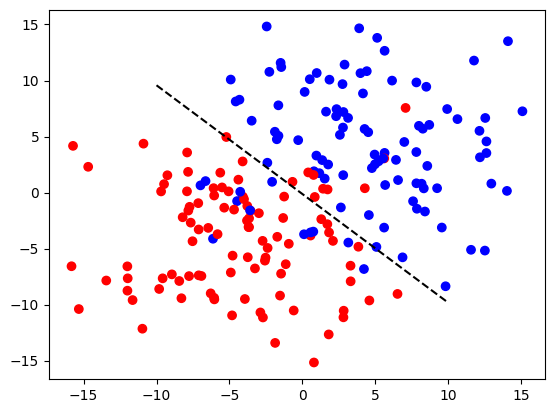

Epoch 29, Loss: 21


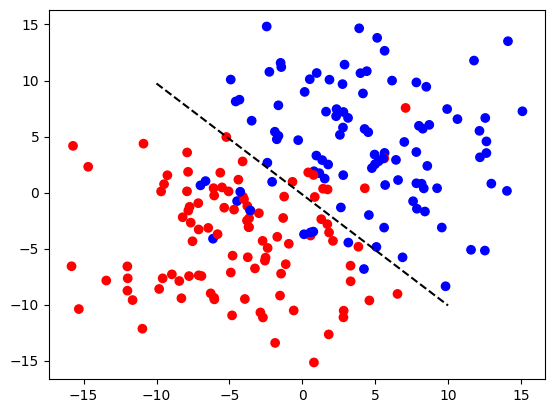

Epoch 30, Loss: 22


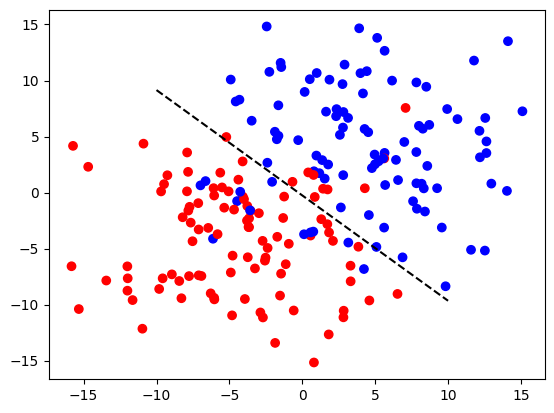

Epoch 31, Loss: 22


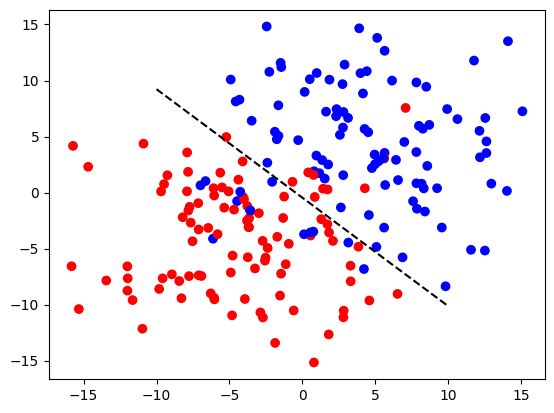

Epoch 32, Loss: 23


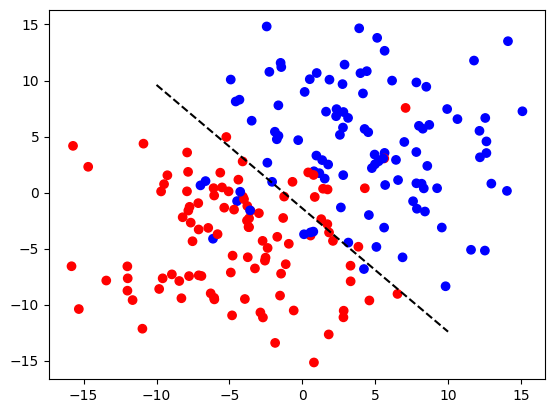

Epoch 33, Loss: 173


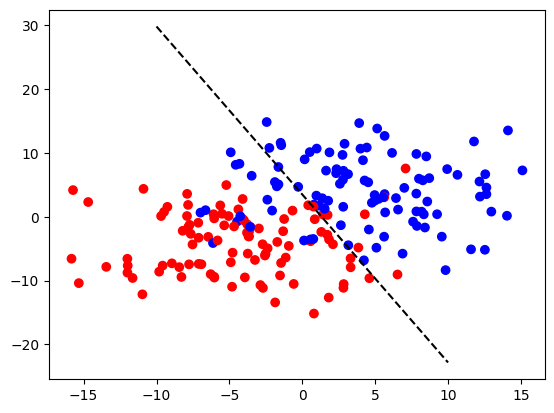

Epoch 34, Loss: 21


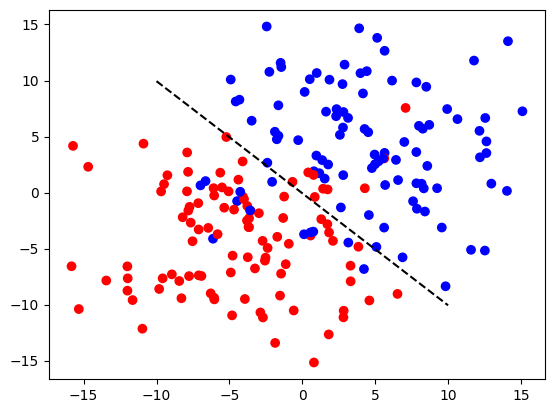

Epoch 35, Loss: 21


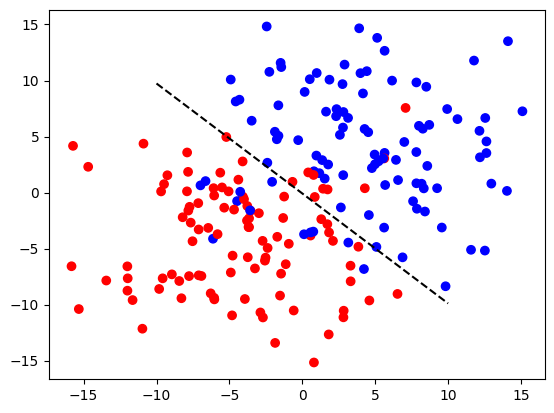

Epoch 36, Loss: 22


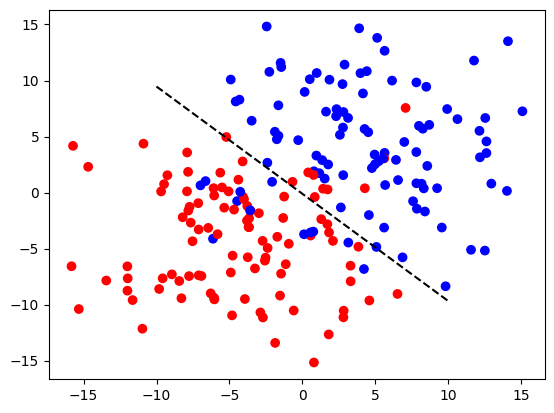

Epoch 37, Loss: 22


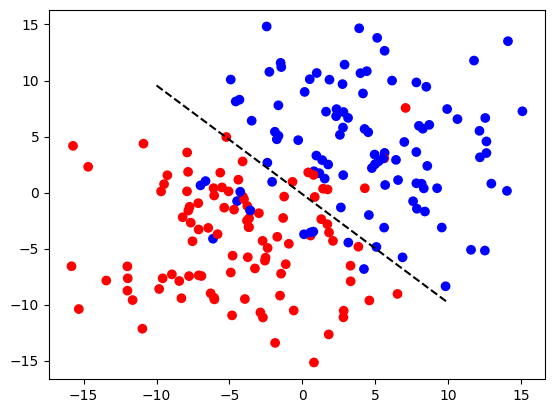

Epoch 38, Loss: 21


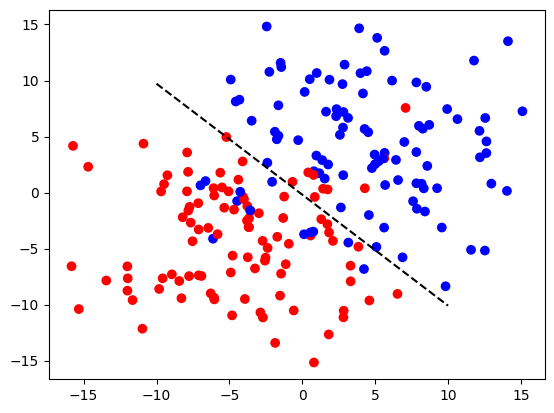

Epoch 39, Loss: 22


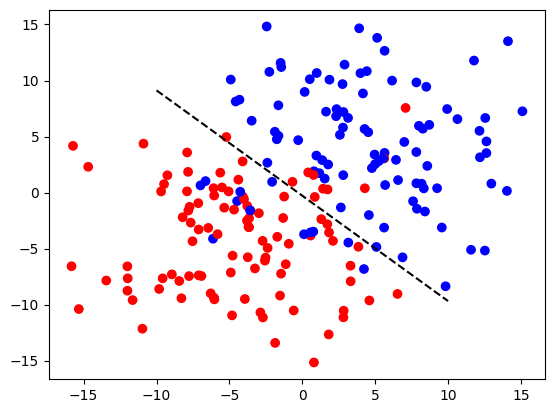

Epoch 40, Loss: 22


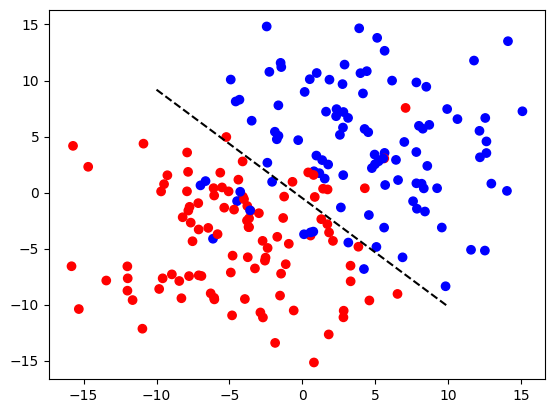

Epoch 41, Loss: 23


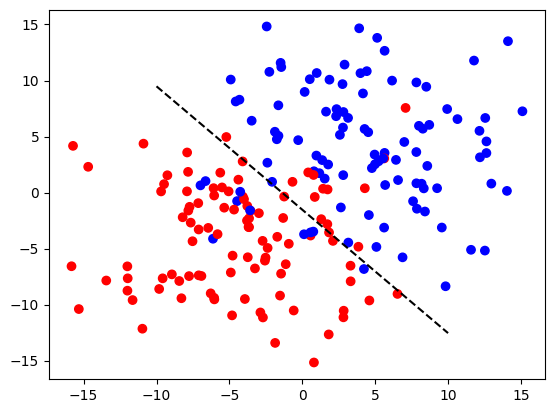

Epoch 42, Loss: 174


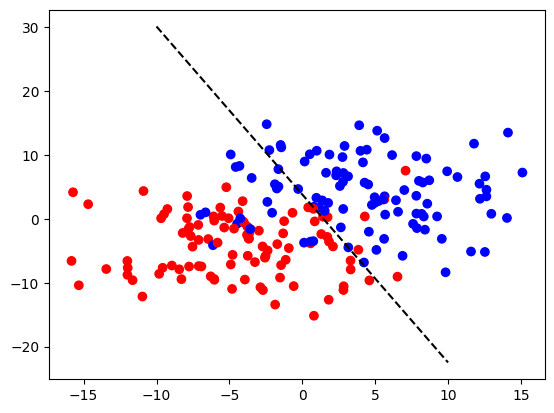

Epoch 43, Loss: 21


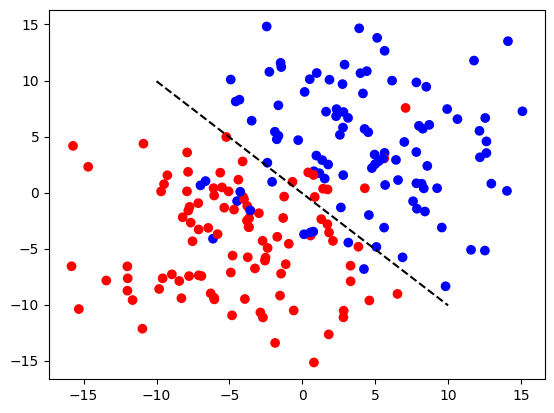

Epoch 44, Loss: 21


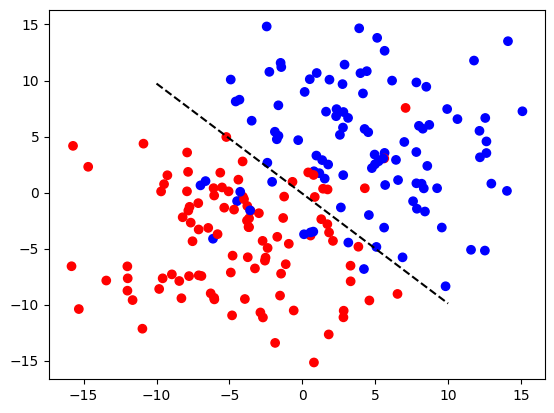

Epoch 45, Loss: 22


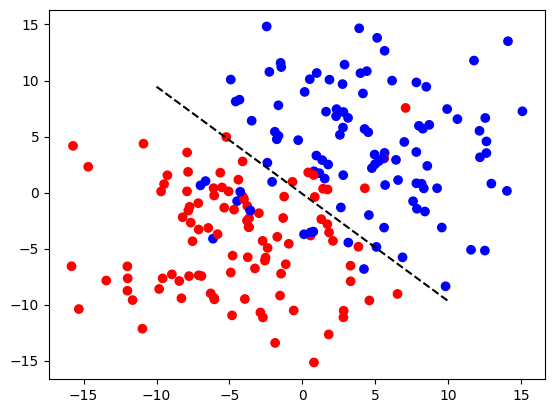

Epoch 46, Loss: 22


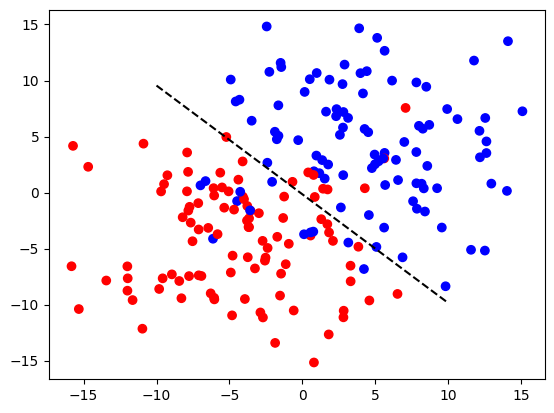

Epoch 47, Loss: 21


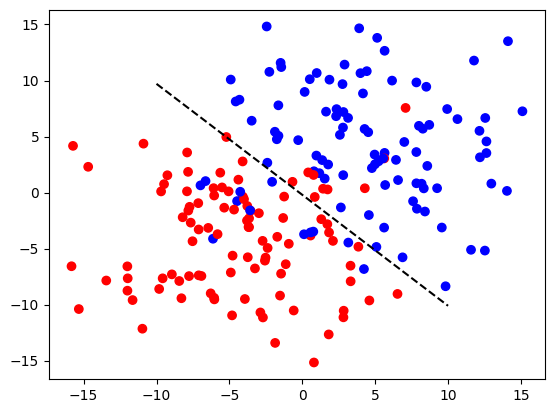

Epoch 48, Loss: 22


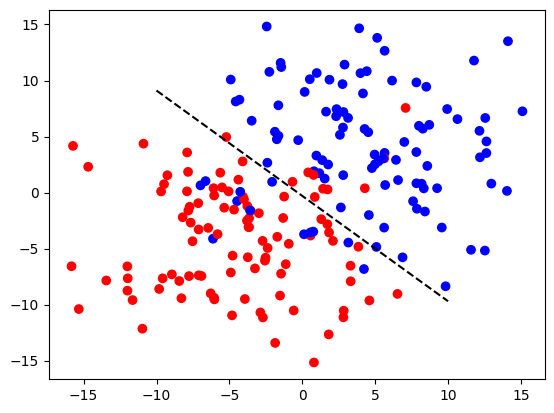

Epoch 49, Loss: 22


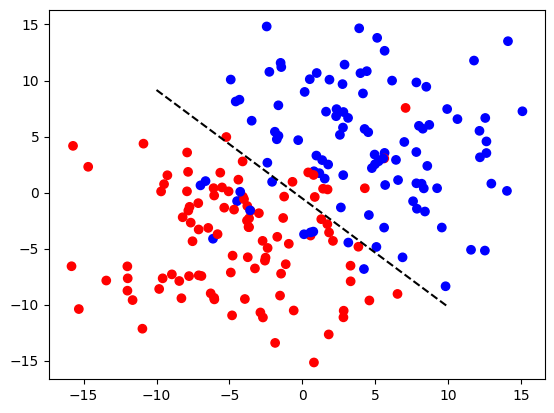

Epoch 50, Loss: 24


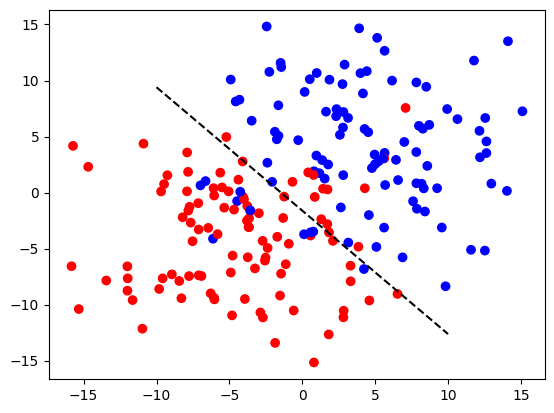

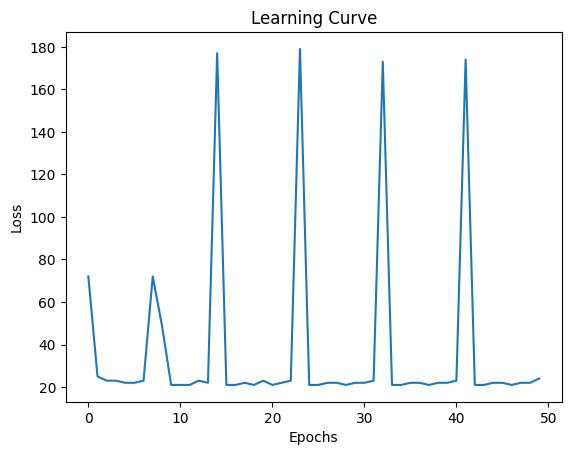

In [68]:
slp = SingleLayerPerceptron(2)
X = np.array([point[0] for point in full_points])
y = np.array([point[1] for point in full_points])
slp.train(X, y, lr=0.03, method="perceptron", epochs=50, visualize=True)

Epoch 1, Loss: 83


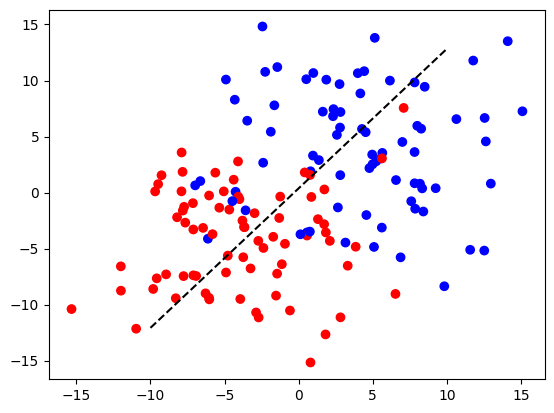

Epoch 2, Loss: 18


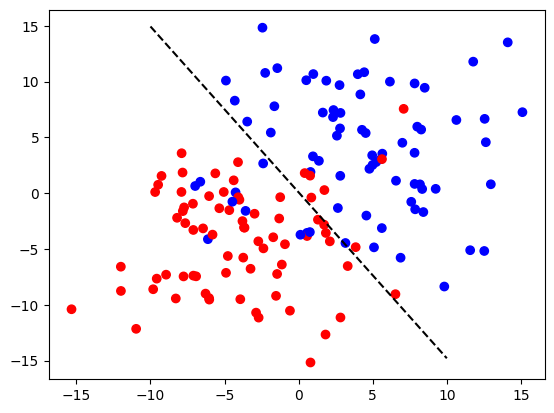

Epoch 3, Loss: 18


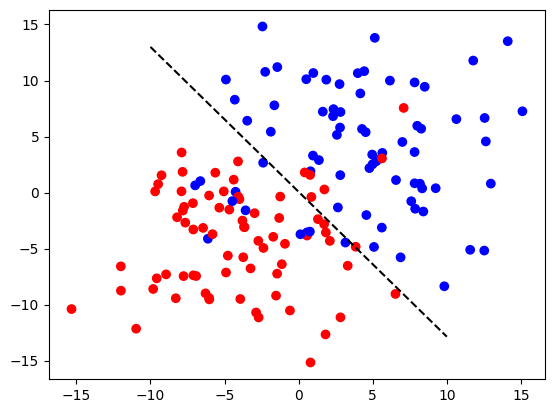

Epoch 4, Loss: 17


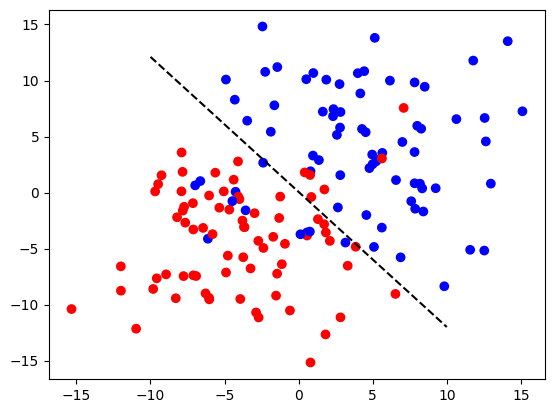

Epoch 5, Loss: 17


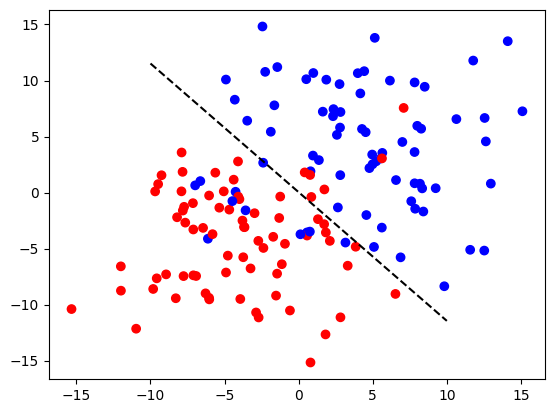

Epoch 6, Loss: 16


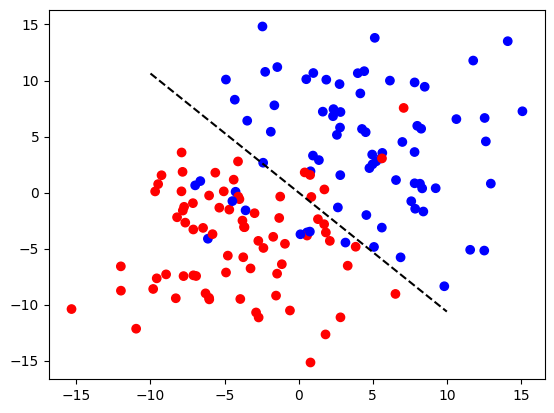

Epoch 7, Loss: 16


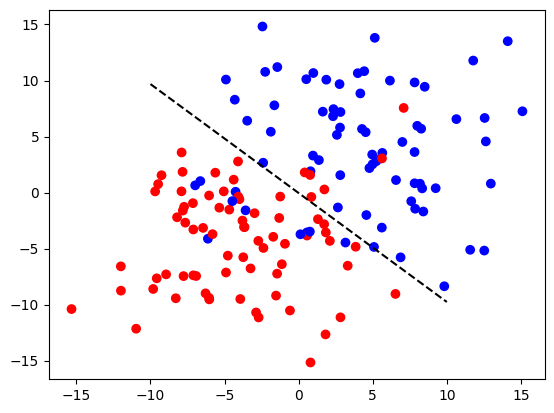

Epoch 8, Loss: 19


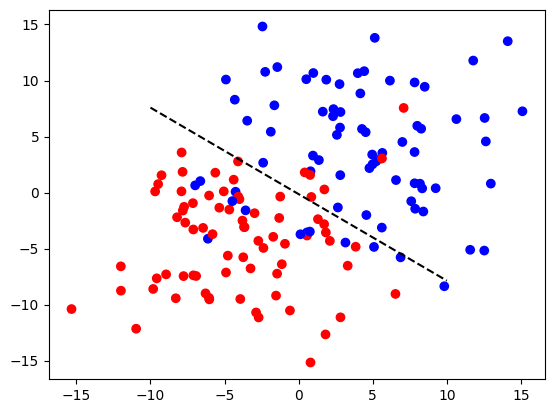

Epoch 9, Loss: 28


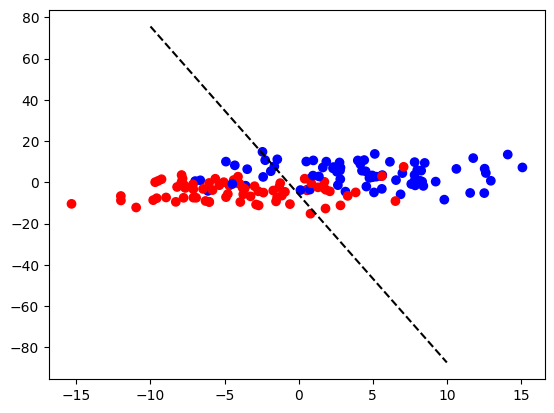

Epoch 10, Loss: 72


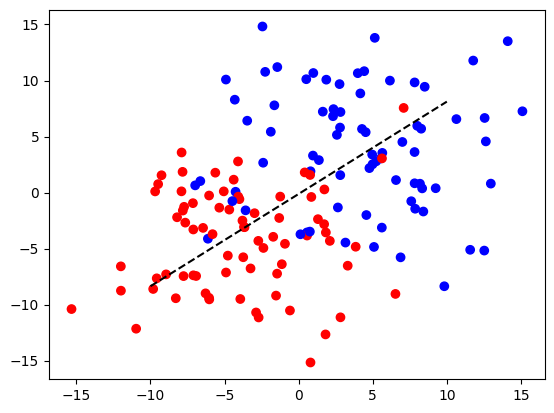

Epoch 11, Loss: 26


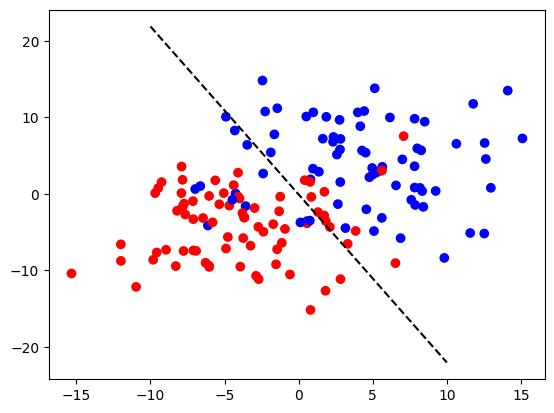

Epoch 12, Loss: 18


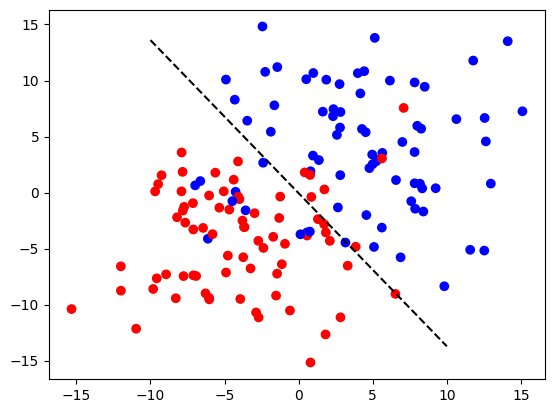

Epoch 13, Loss: 18


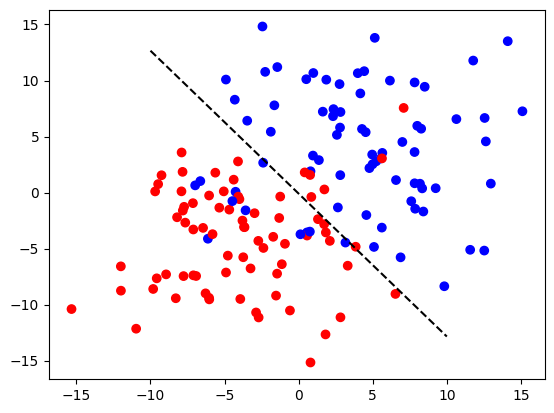

Epoch 14, Loss: 16


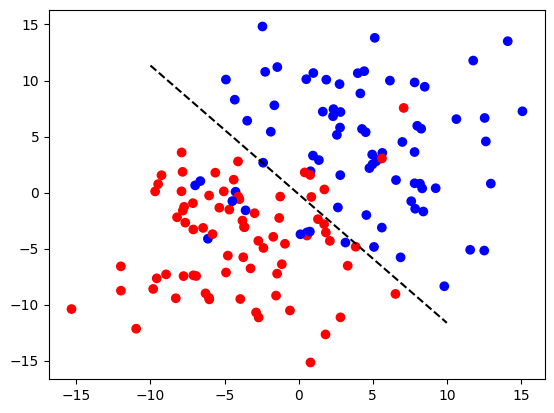

Epoch 15, Loss: 16


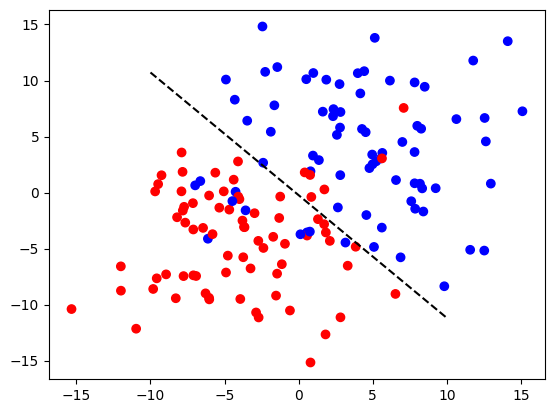

Epoch 16, Loss: 16


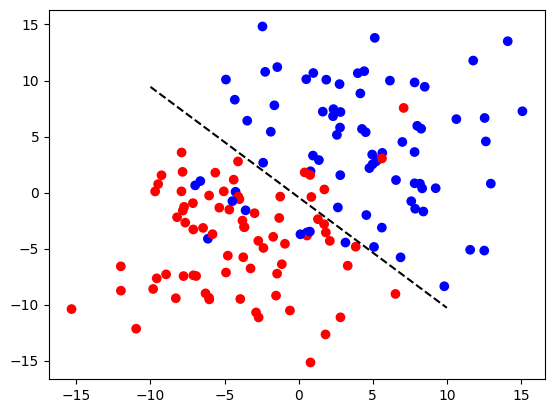

Epoch 17, Loss: 20


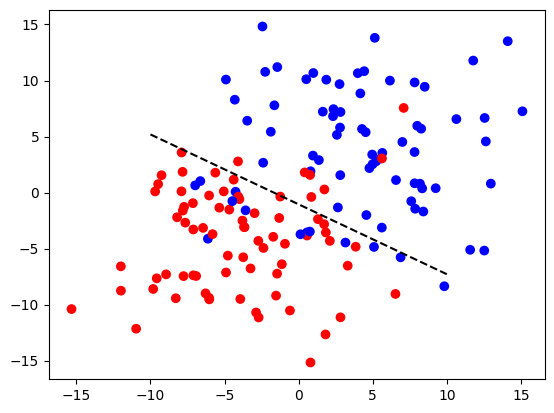

Epoch 18, Loss: 114


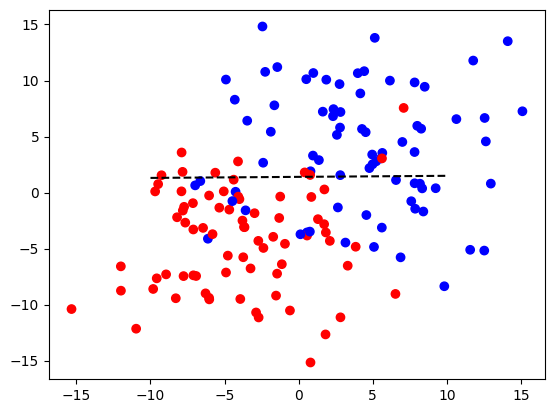

Epoch 19, Loss: 16


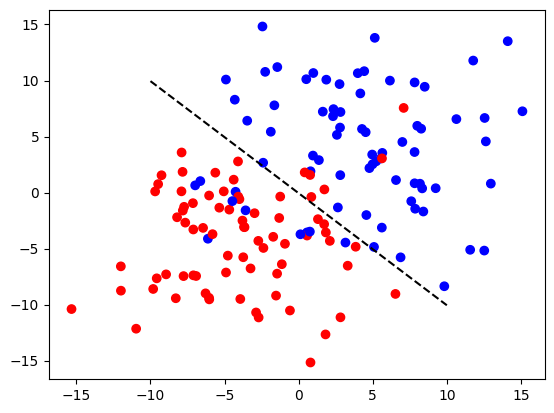

Epoch 20, Loss: 16


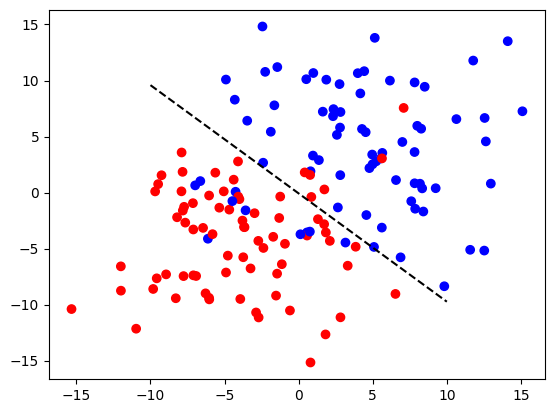

Epoch 21, Loss: 17


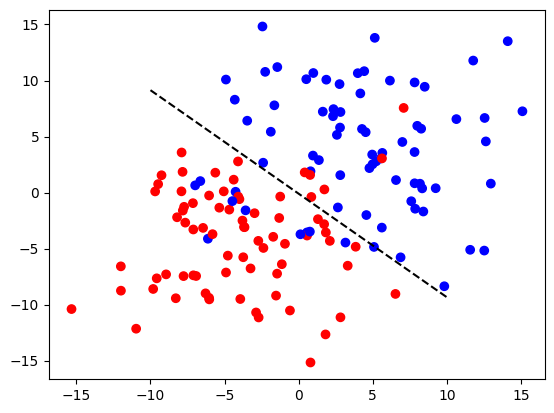

Epoch 22, Loss: 17


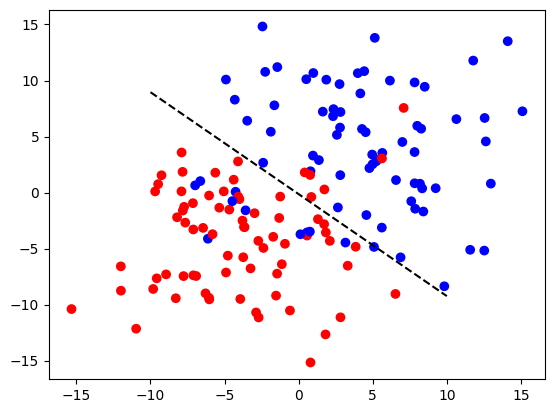

Epoch 23, Loss: 17


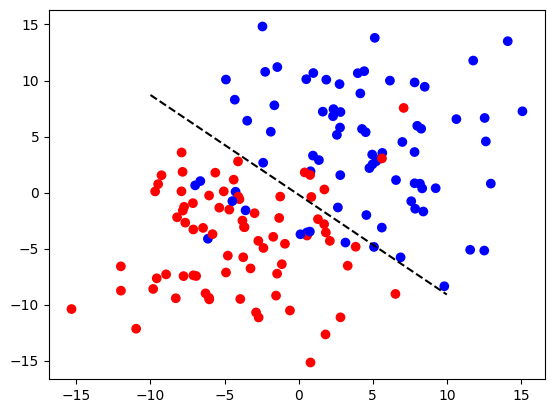

Epoch 24, Loss: 17


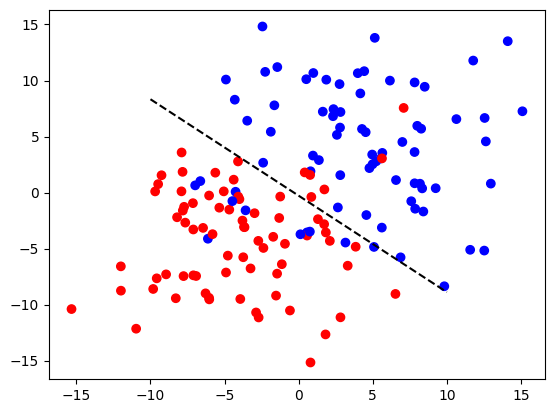

Epoch 25, Loss: 17


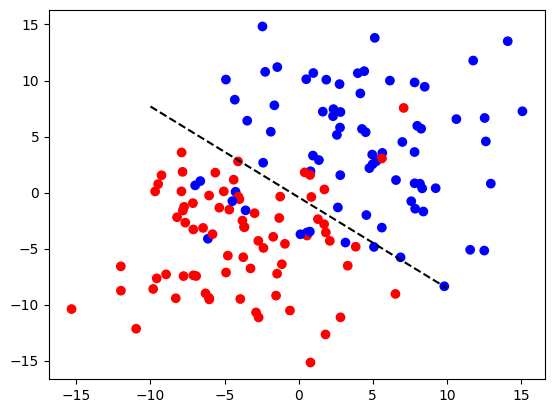

Epoch 26, Loss: 20


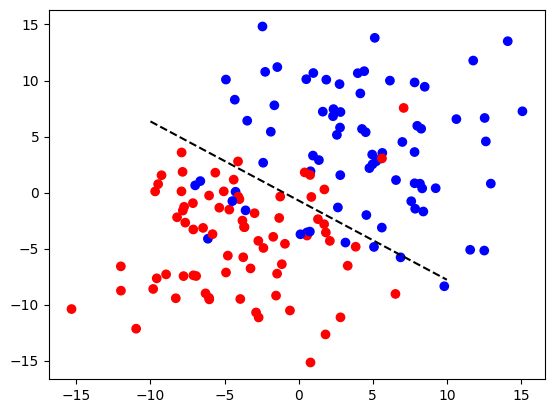

Epoch 27, Loss: 22


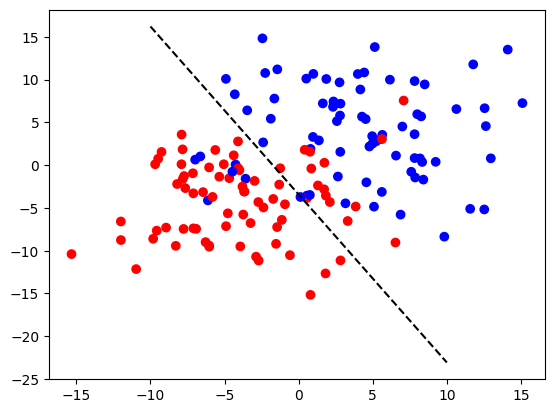

Epoch 28, Loss: 82


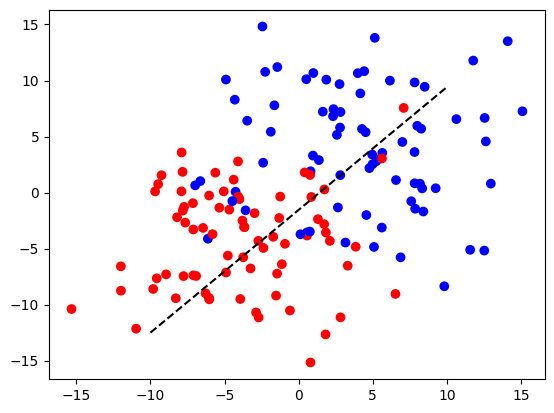

Epoch 29, Loss: 23


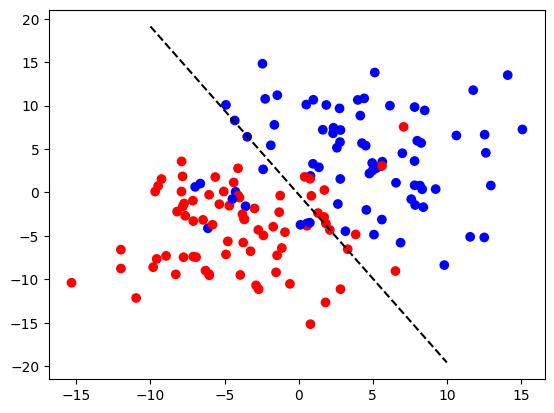

Epoch 30, Loss: 18


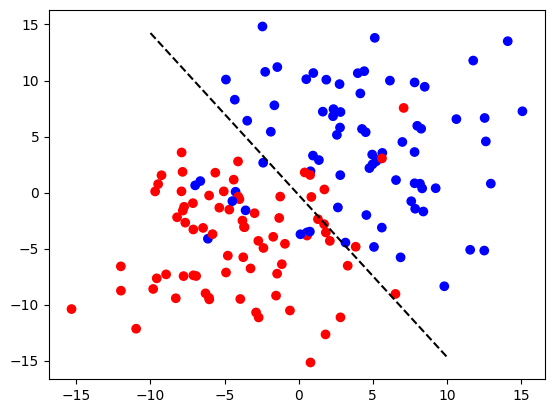

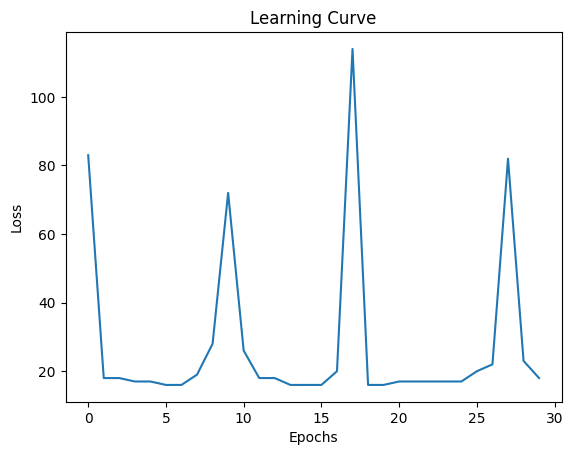

Epoch 1, Loss: 15


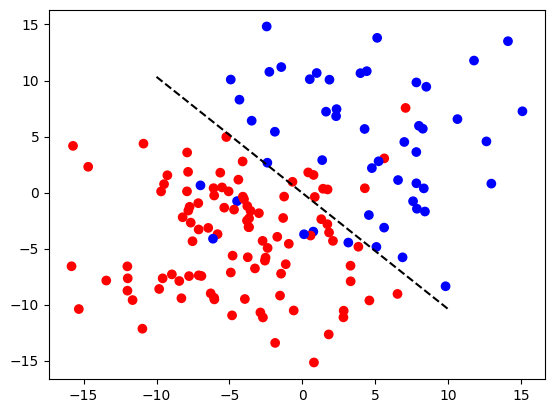

Epoch 2, Loss: 15


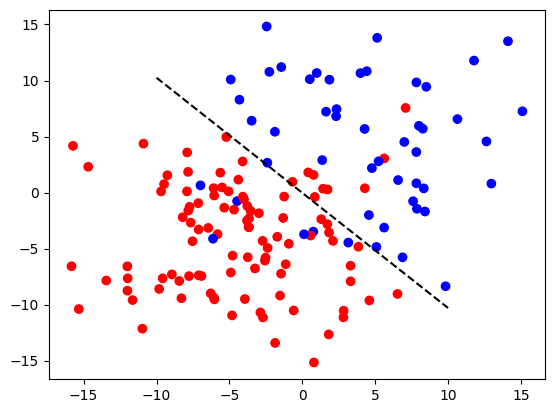

Epoch 3, Loss: 15


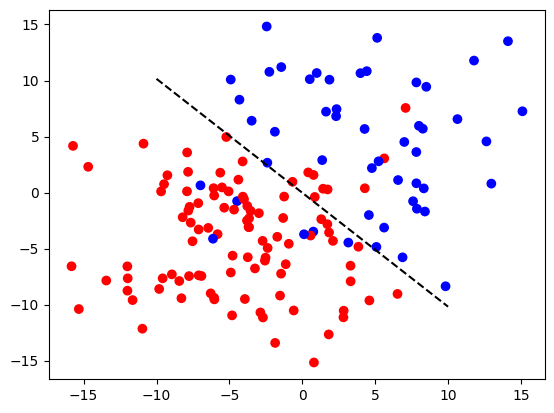

Epoch 4, Loss: 15


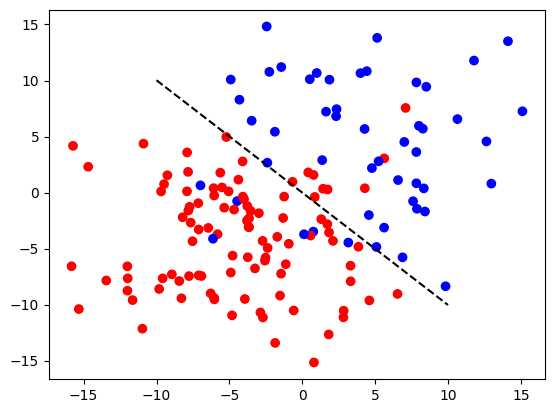

Epoch 5, Loss: 15


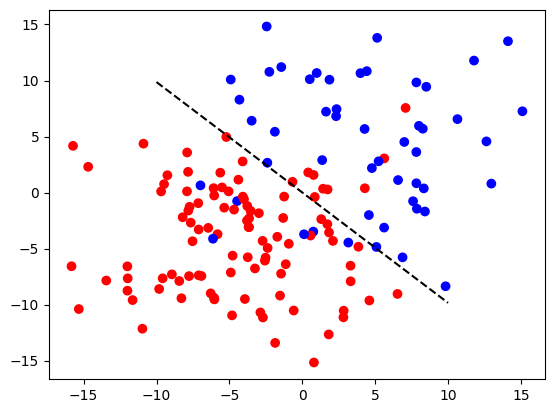

Epoch 6, Loss: 15


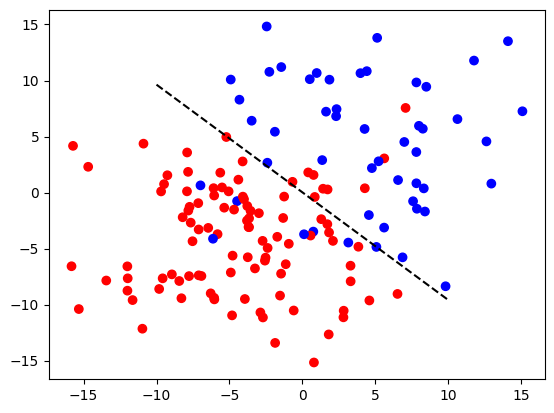

Epoch 7, Loss: 17


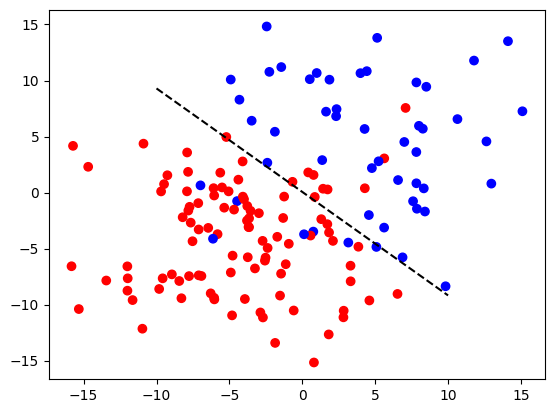

Epoch 8, Loss: 16


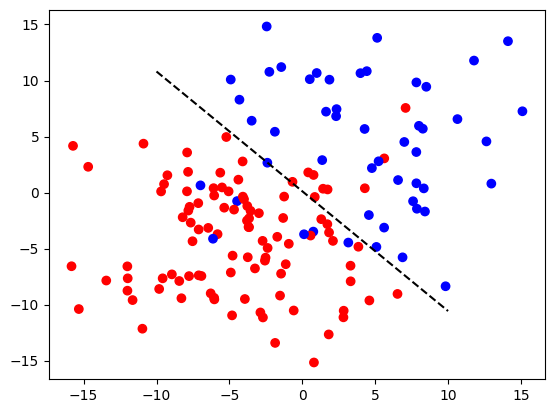

Epoch 9, Loss: 16


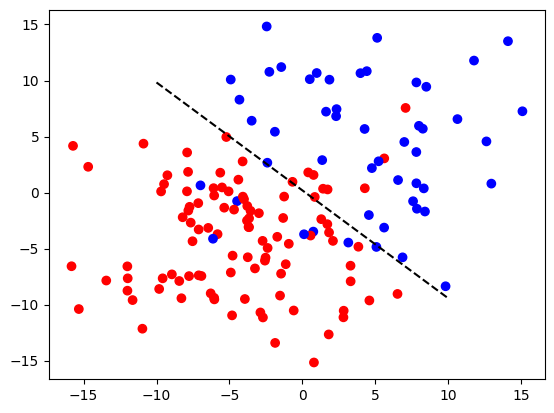

Epoch 10, Loss: 15


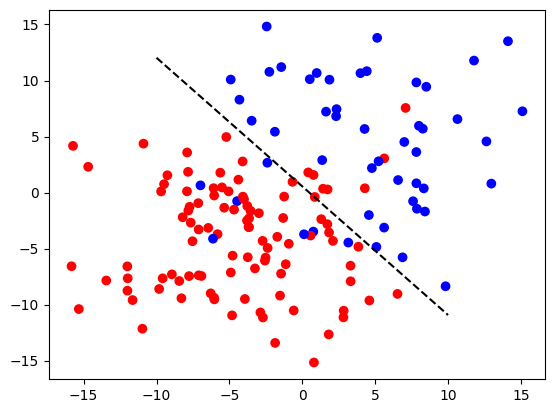

Epoch 11, Loss: 117


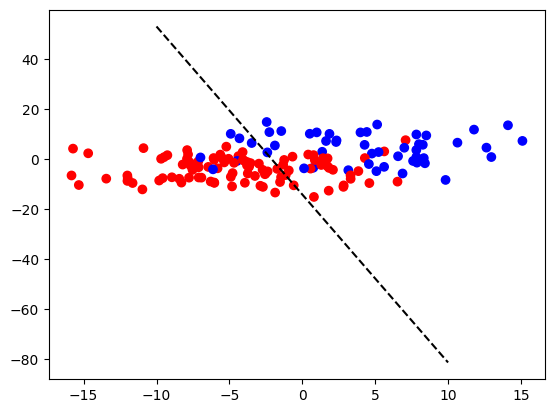

Epoch 12, Loss: 15


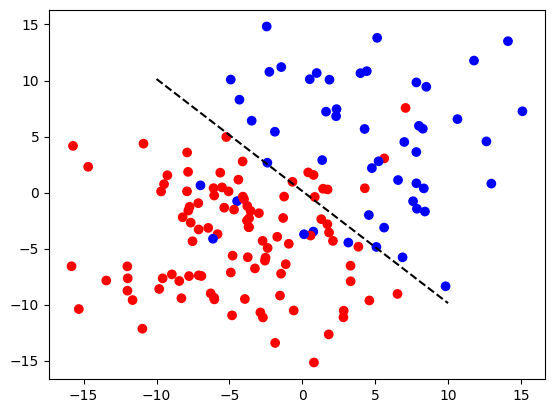

Epoch 13, Loss: 15


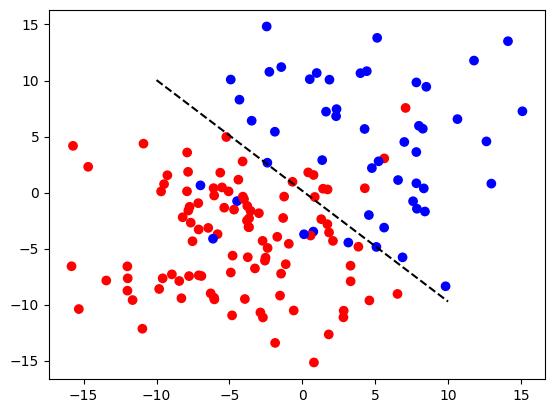

Epoch 14, Loss: 16


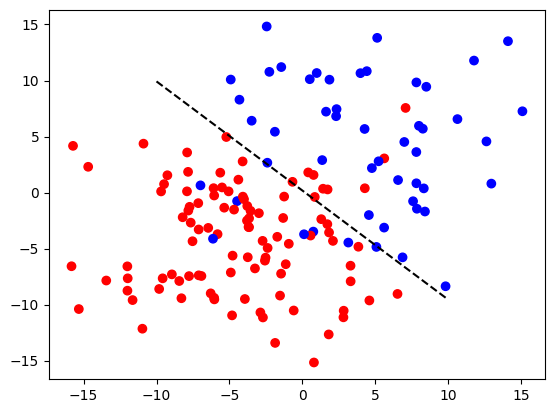

Epoch 15, Loss: 16


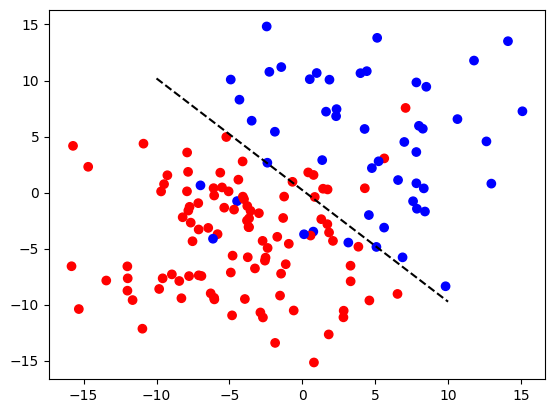

Epoch 16, Loss: 15


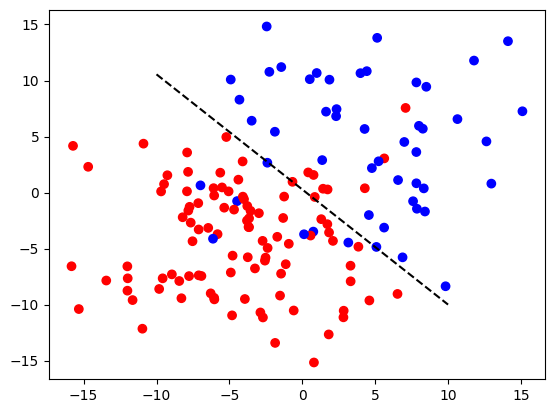

Epoch 17, Loss: 15


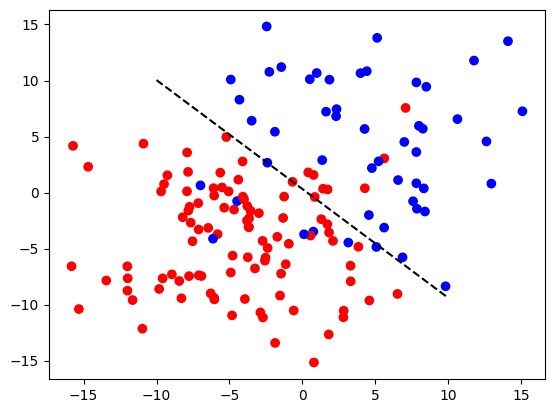

Epoch 18, Loss: 16


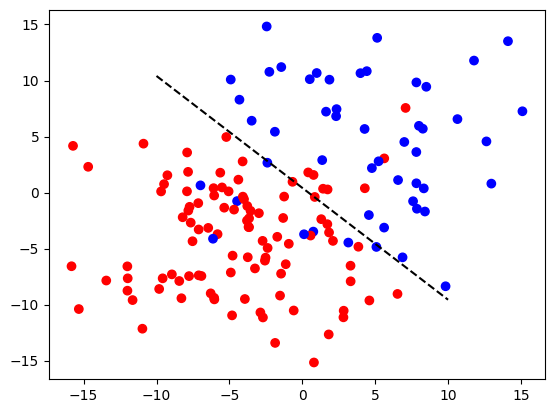

Epoch 19, Loss: 15


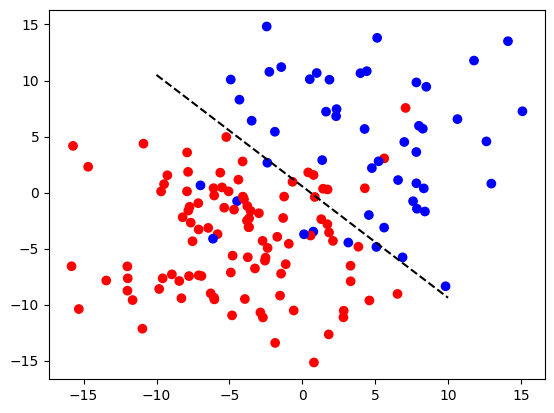

Epoch 20, Loss: 15


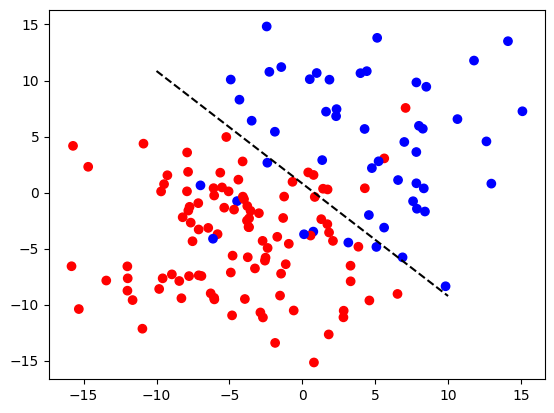

Epoch 21, Loss: 16


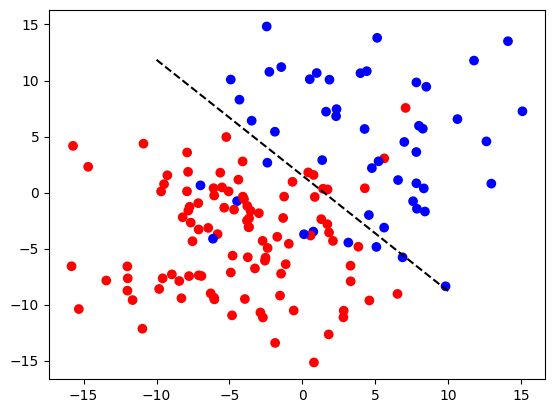

Epoch 22, Loss: 38


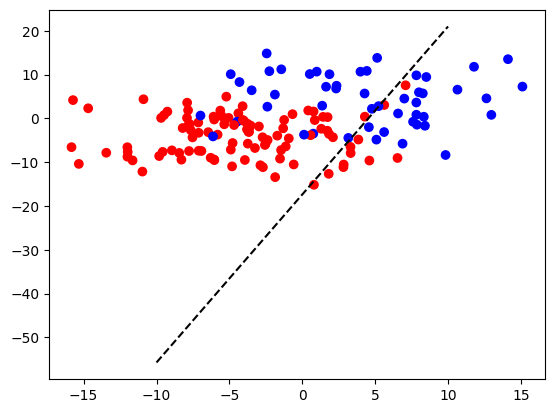

Epoch 23, Loss: 39


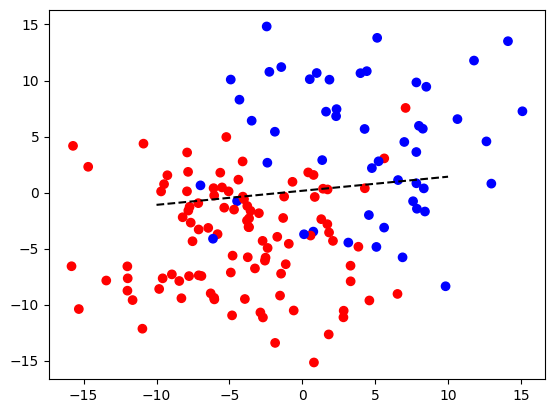

Epoch 24, Loss: 15


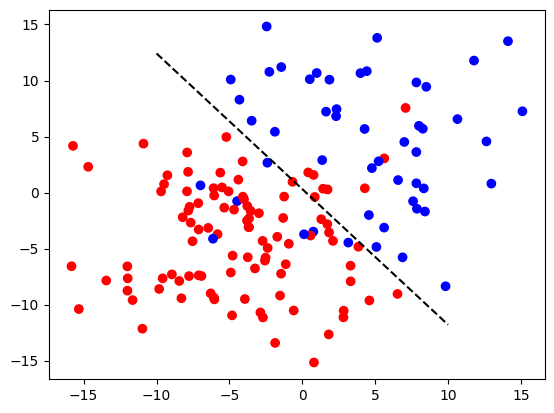

Epoch 25, Loss: 15


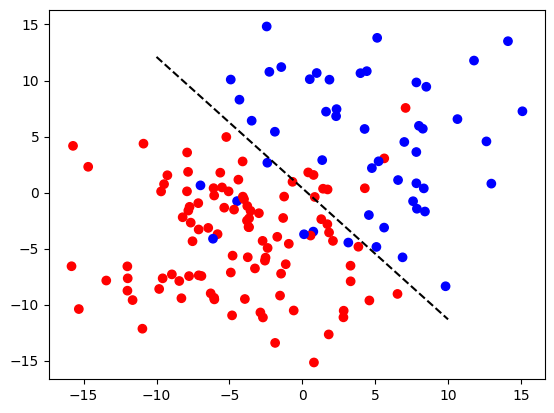

Epoch 26, Loss: 15


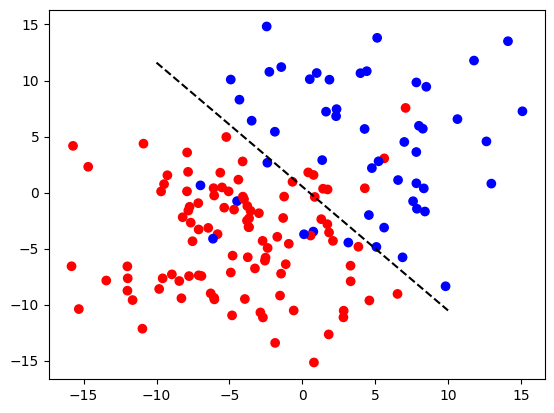

Epoch 27, Loss: 15


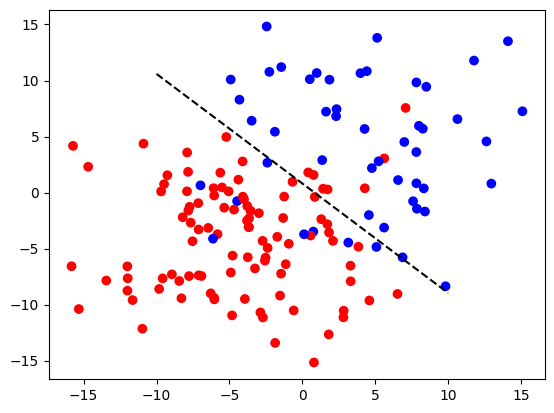

Epoch 28, Loss: 16


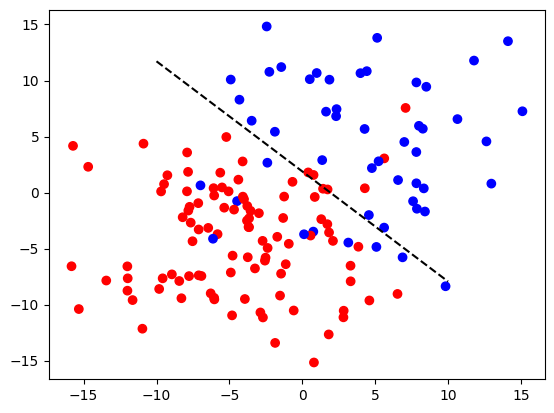

Epoch 29, Loss: 86


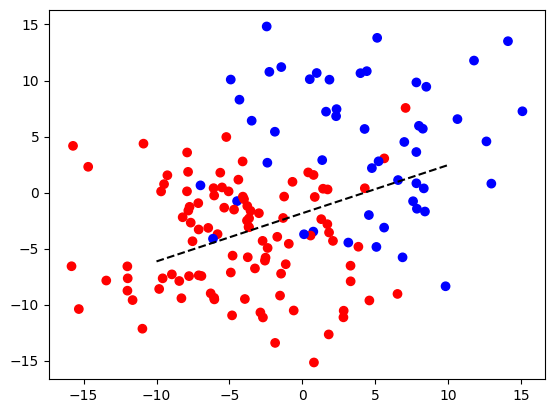

Epoch 30, Loss: 17


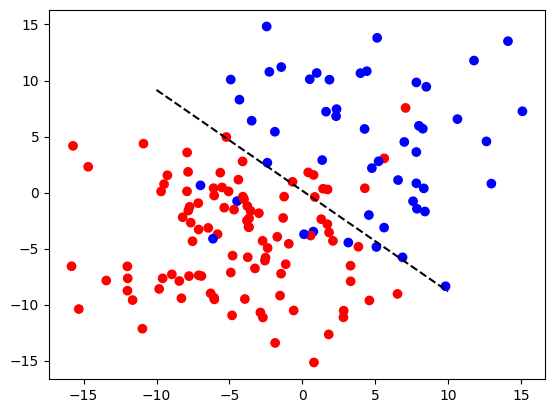

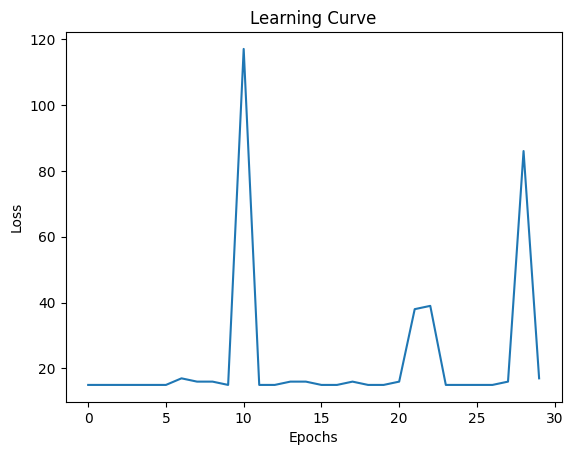

Epoch 1, Loss: 17


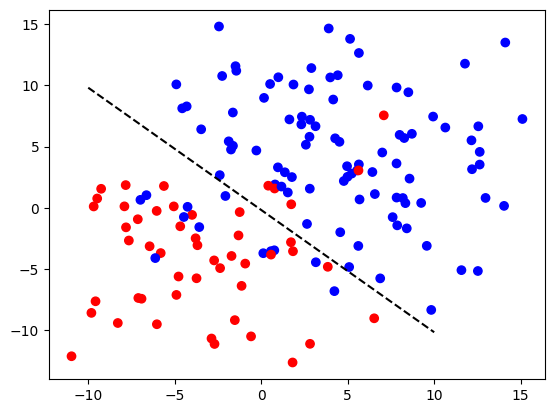

Epoch 2, Loss: 17


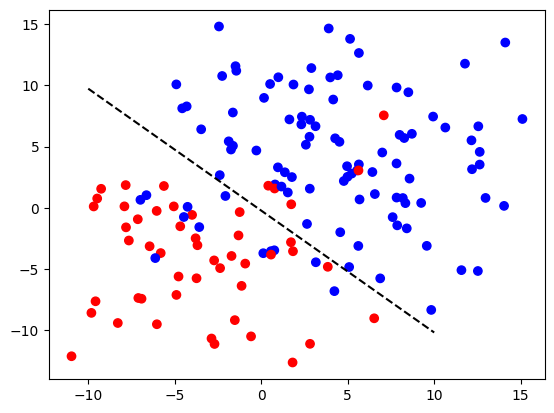

Epoch 3, Loss: 17


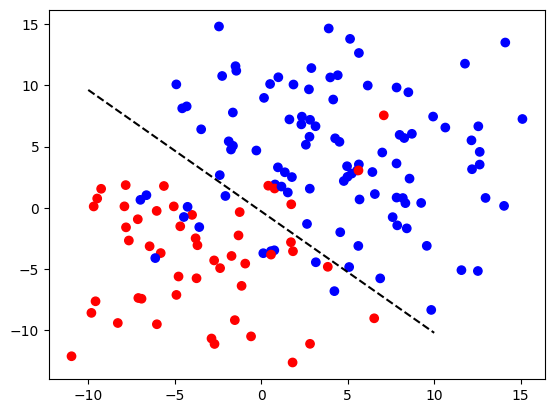

Epoch 4, Loss: 17


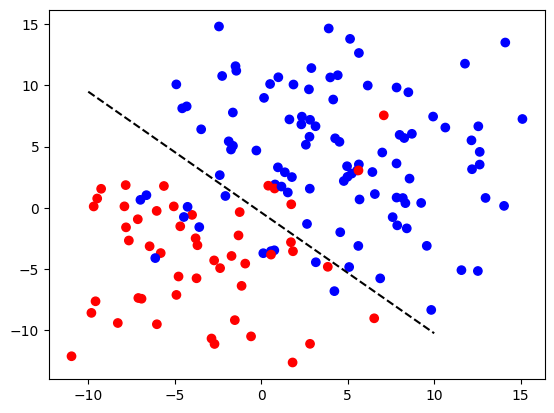

Epoch 5, Loss: 17


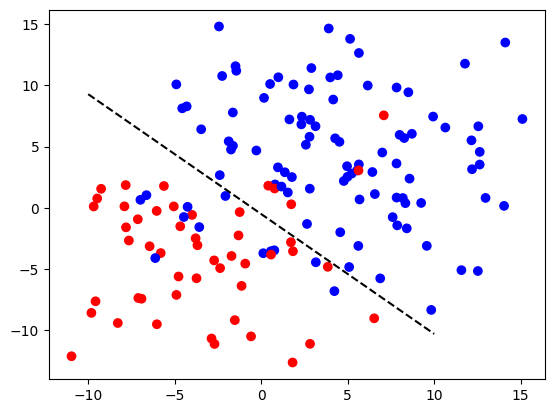

Epoch 6, Loss: 17


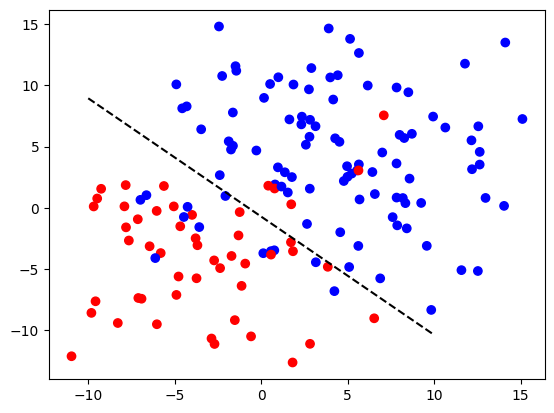

Epoch 7, Loss: 16


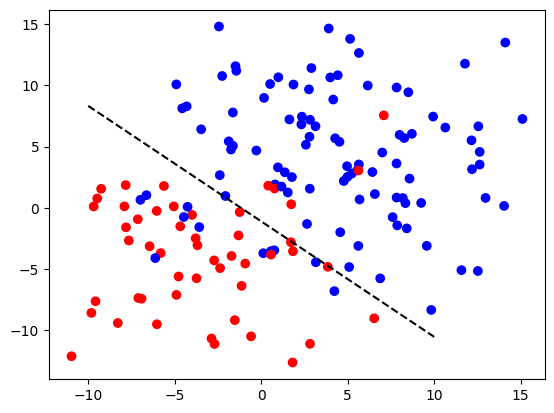

Epoch 8, Loss: 19


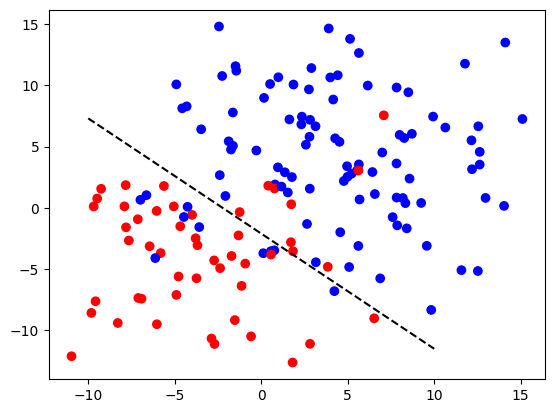

Epoch 9, Loss: 36


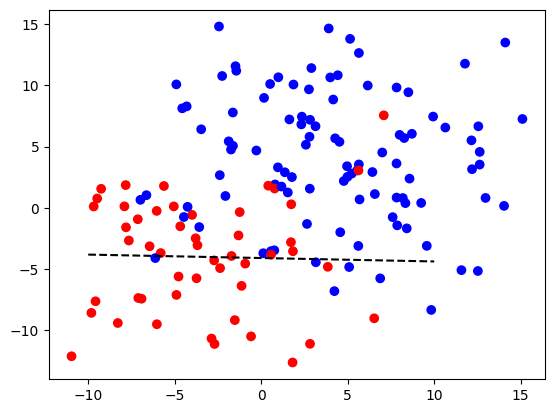

Epoch 10, Loss: 33


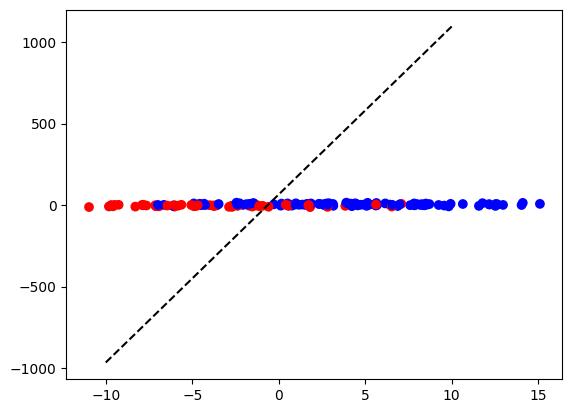

Epoch 11, Loss: 25


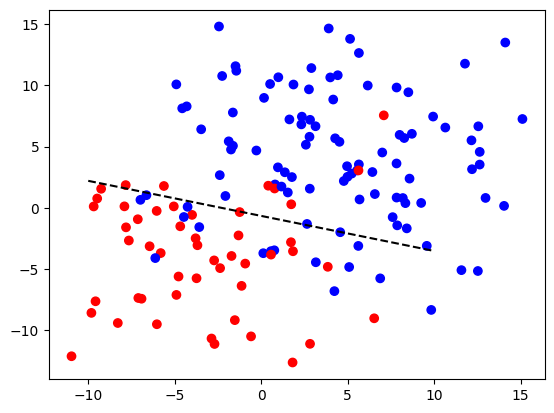

Epoch 12, Loss: 18


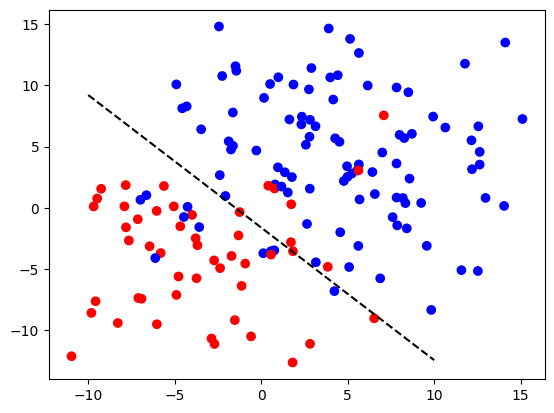

Epoch 13, Loss: 20


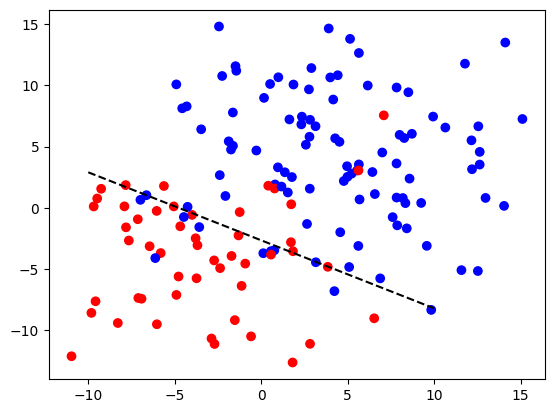

Epoch 14, Loss: 50


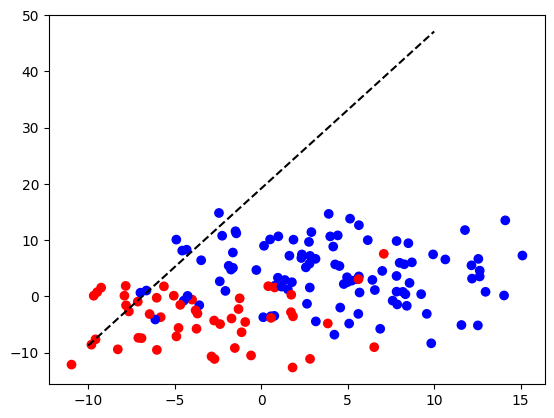

Epoch 15, Loss: 20


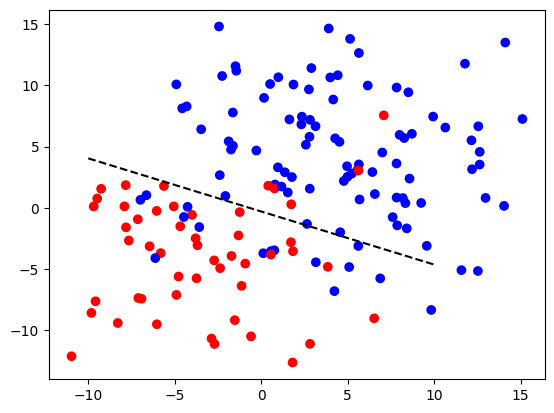

Epoch 16, Loss: 19


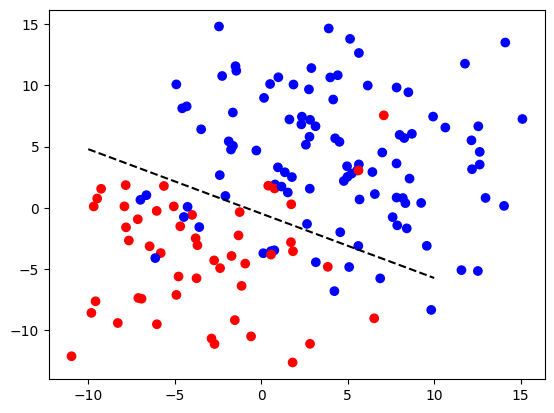

Epoch 17, Loss: 19


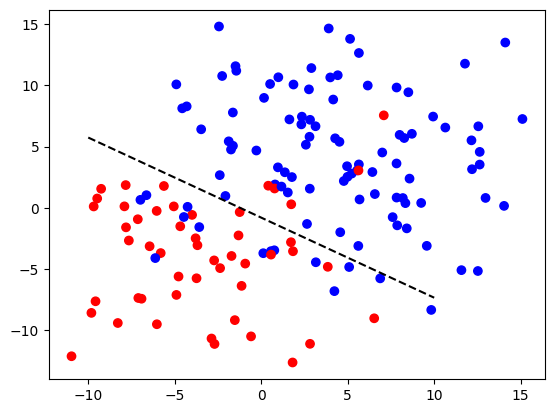

Epoch 18, Loss: 19


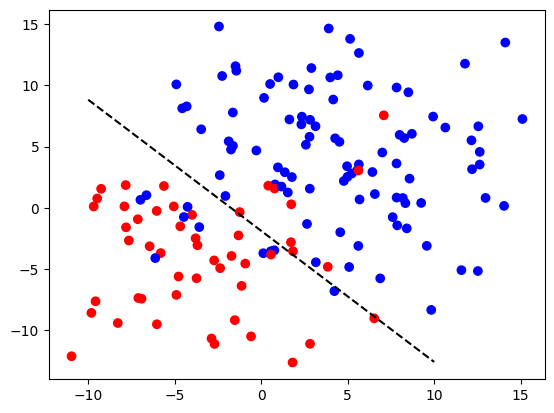

Epoch 19, Loss: 24


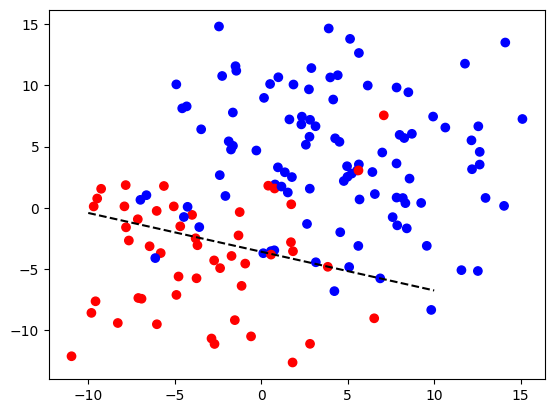

Epoch 20, Loss: 35


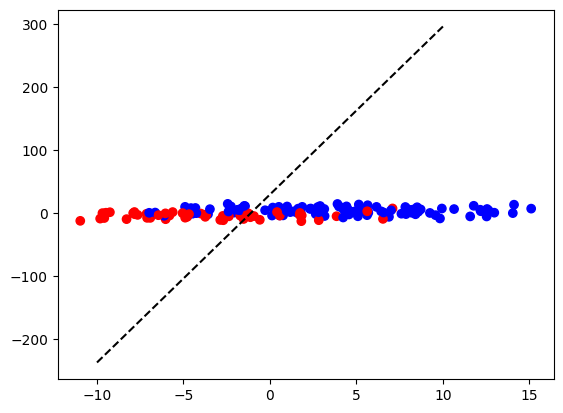

Epoch 21, Loss: 40


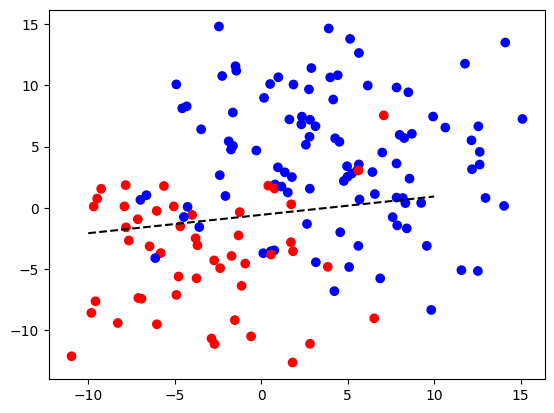

Epoch 22, Loss: 24


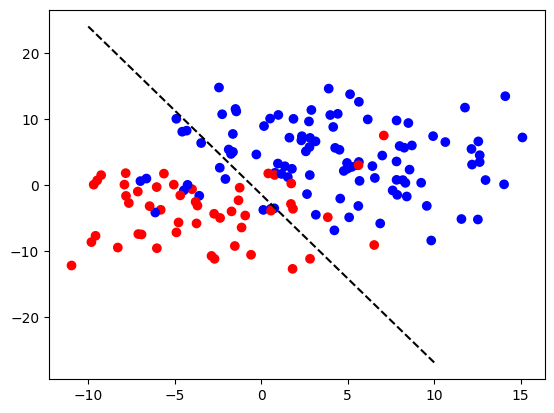

Epoch 23, Loss: 18


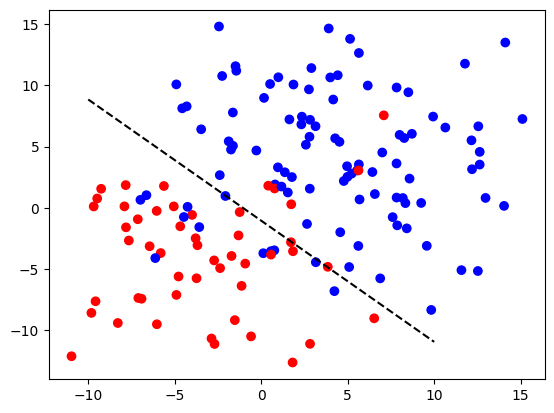

Epoch 24, Loss: 19


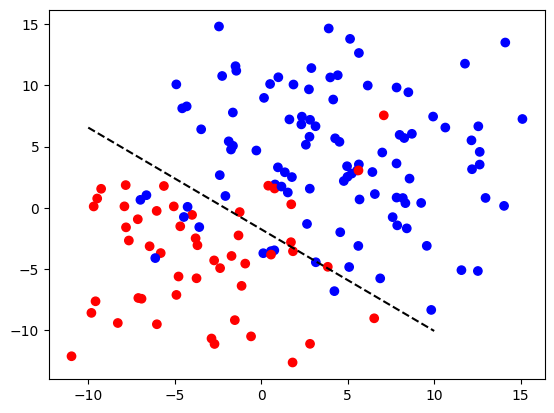

Epoch 25, Loss: 27


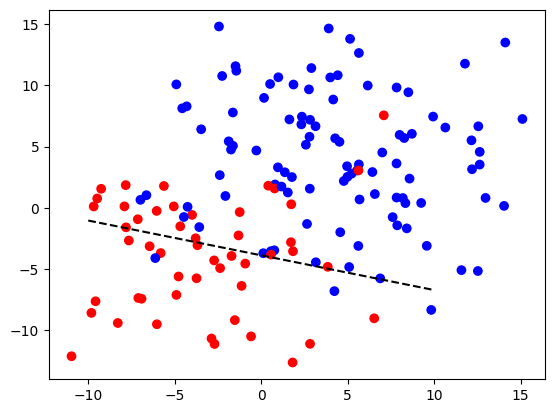

Epoch 26, Loss: 24


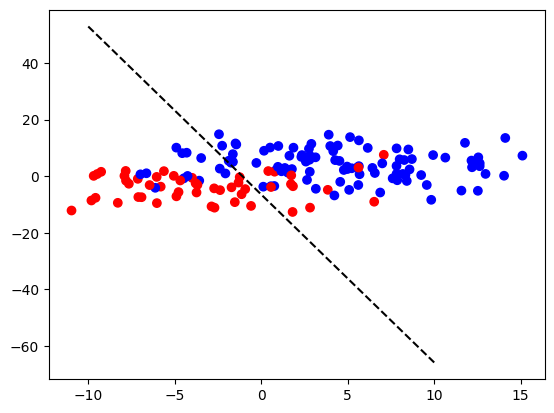

Epoch 27, Loss: 36


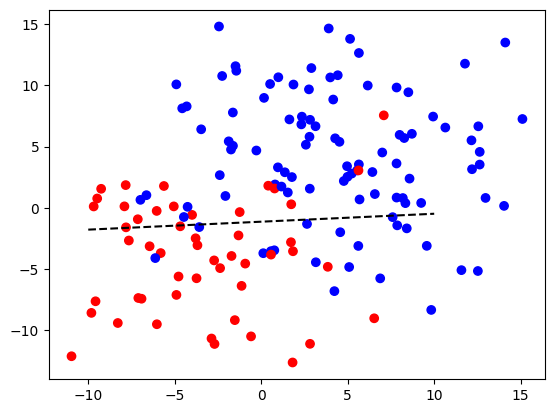

Epoch 28, Loss: 33


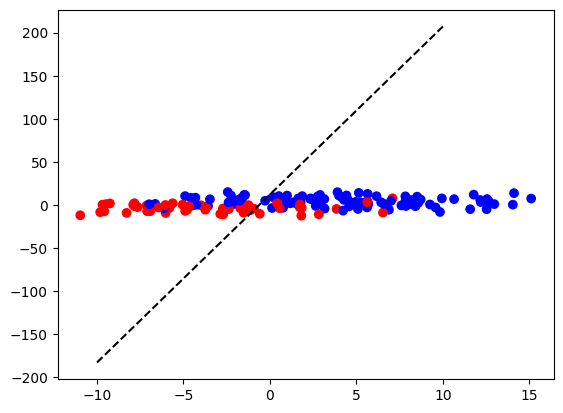

Epoch 29, Loss: 23


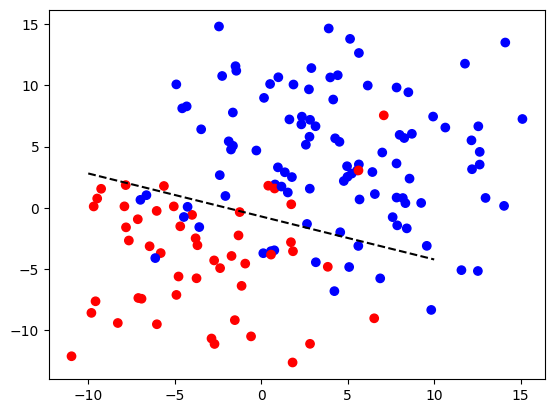

Epoch 30, Loss: 19


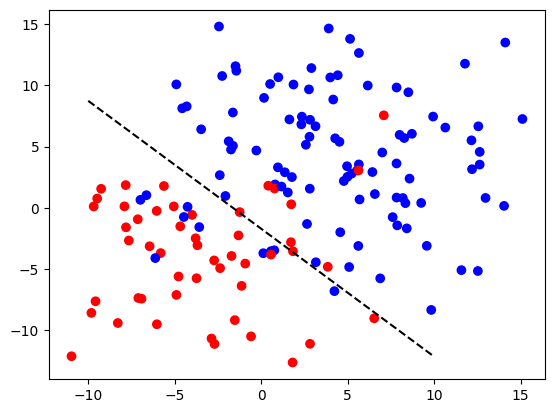

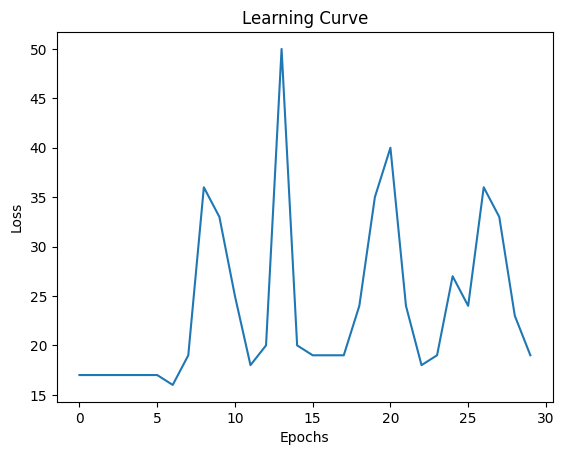

Epoch 1, Loss: 18


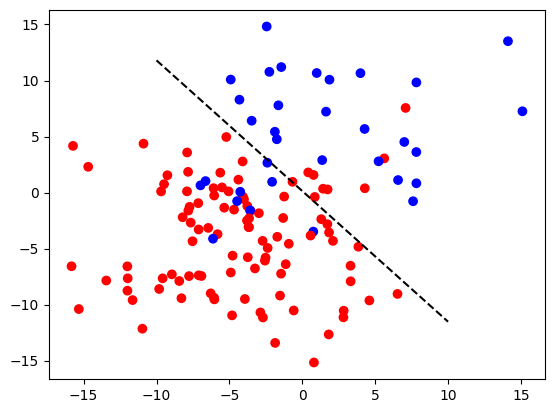

Epoch 2, Loss: 17


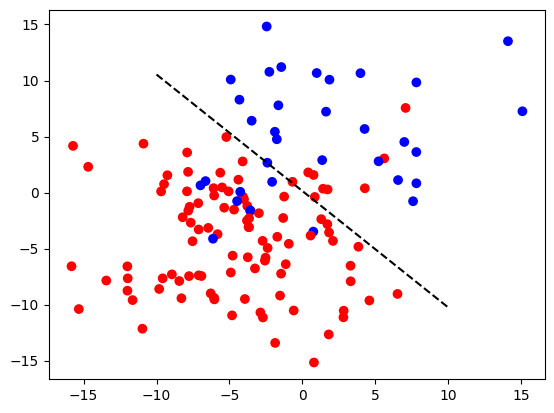

Epoch 3, Loss: 18


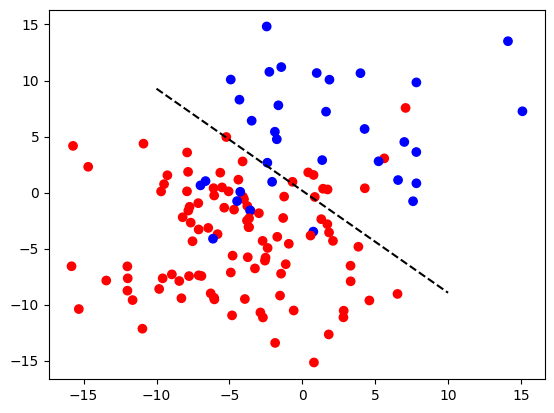

Epoch 4, Loss: 18


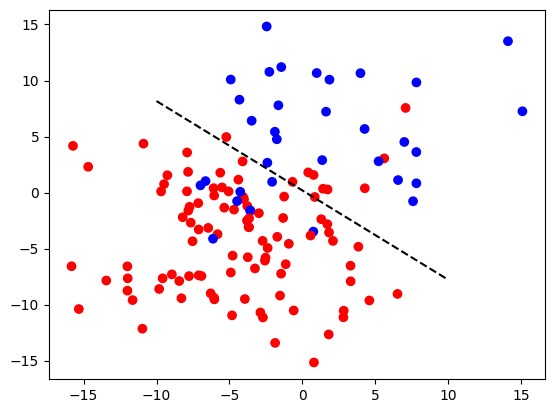

Epoch 5, Loss: 17


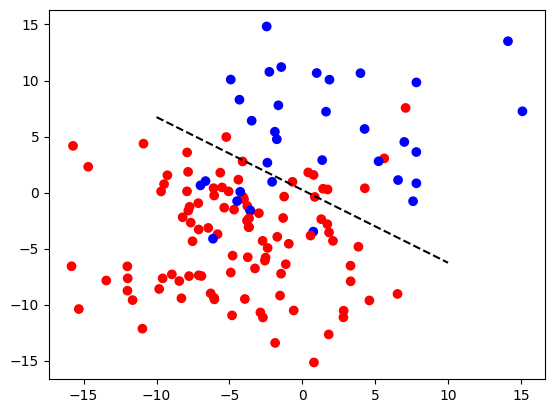

Epoch 6, Loss: 18


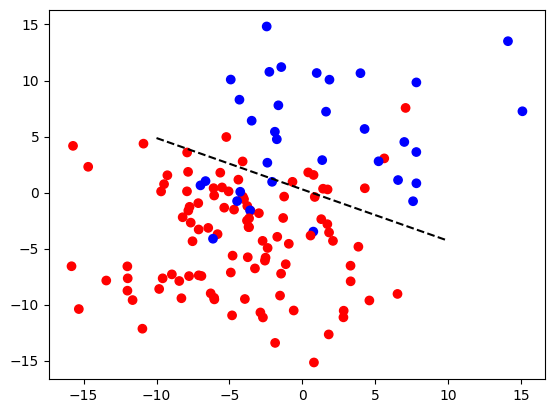

Epoch 7, Loss: 21


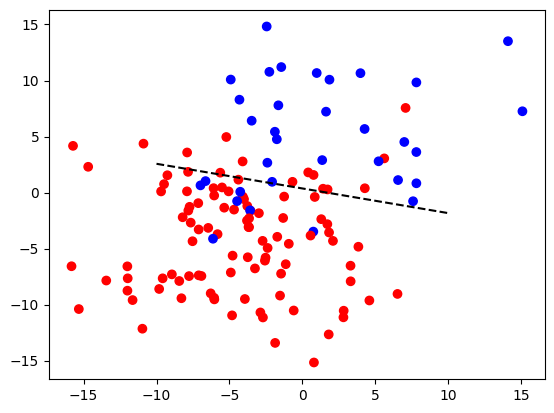

Epoch 8, Loss: 20


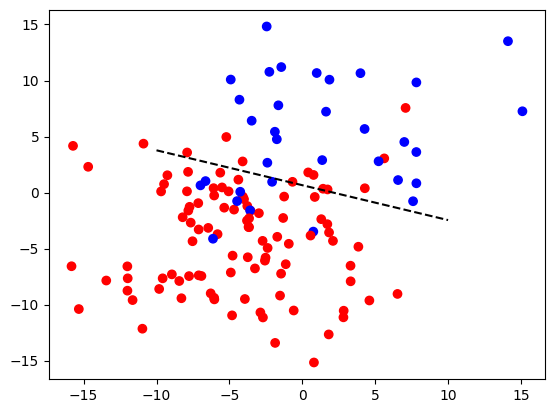

Epoch 9, Loss: 24


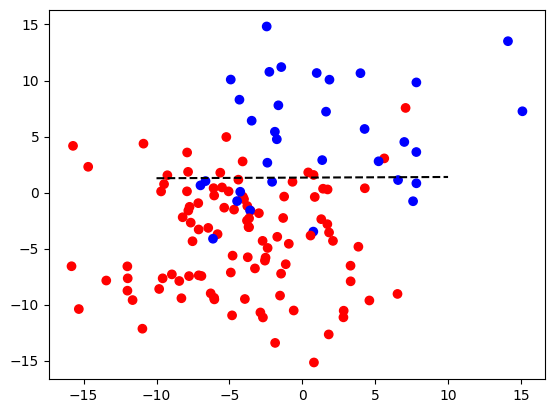

Epoch 10, Loss: 37


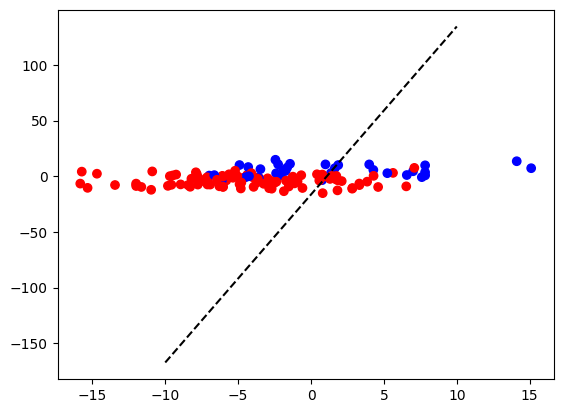

Epoch 11, Loss: 35


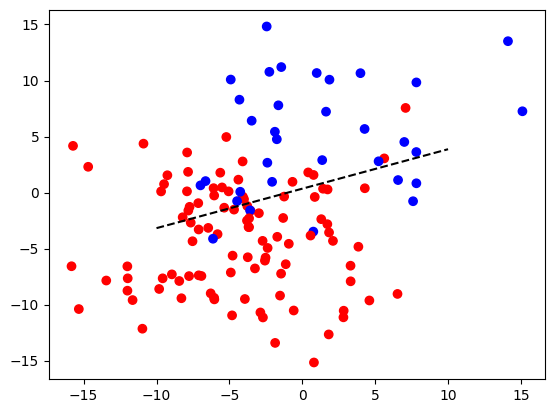

Epoch 12, Loss: 16


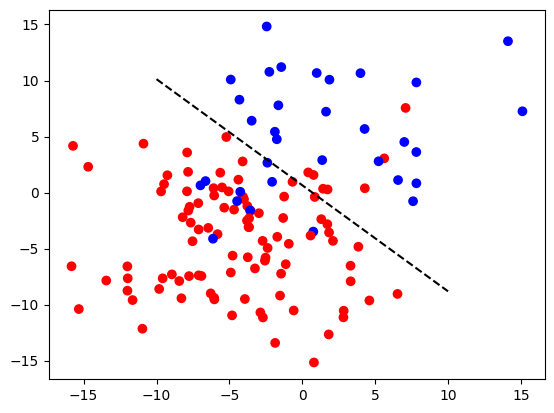

Epoch 13, Loss: 16


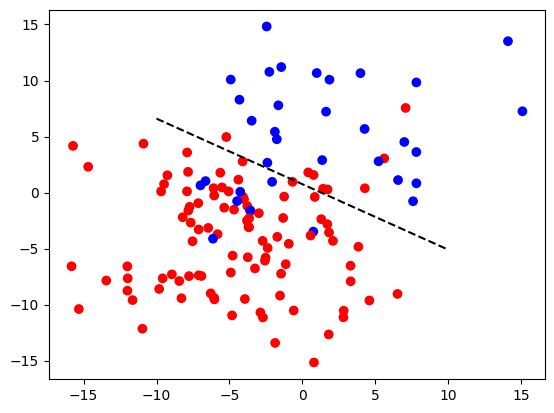

Epoch 14, Loss: 19


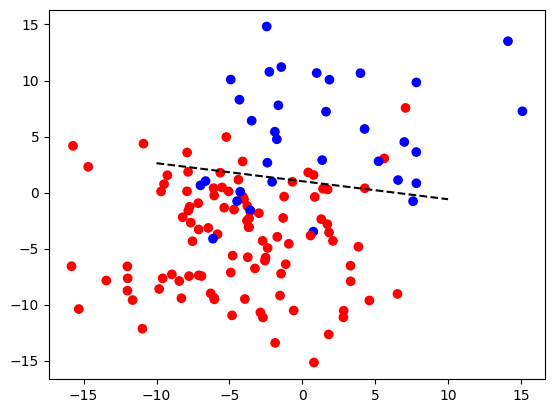

Epoch 15, Loss: 13


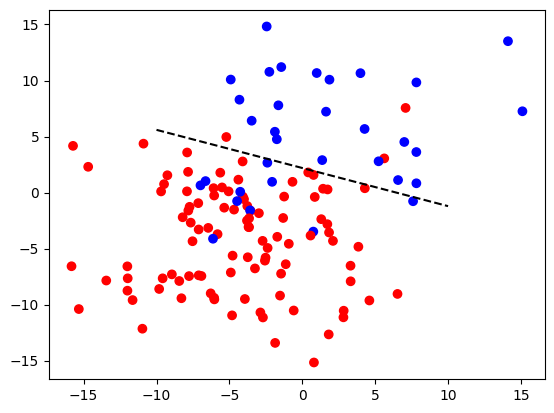

Epoch 16, Loss: 53


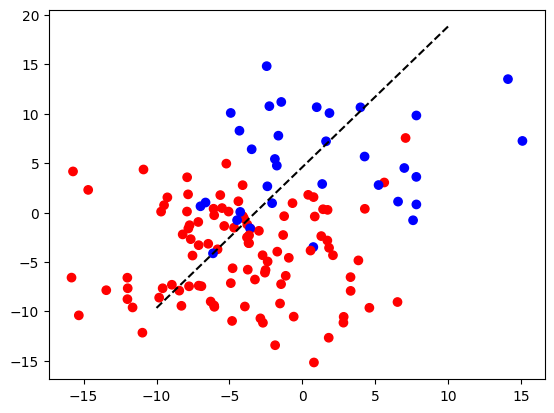

Epoch 17, Loss: 29


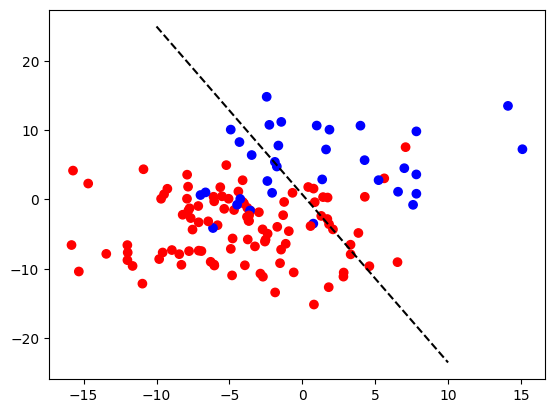

Epoch 18, Loss: 17


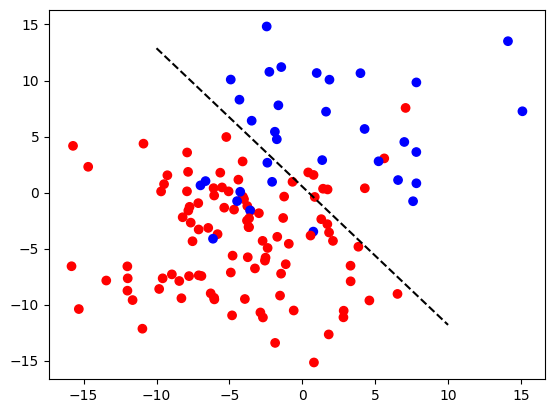

Epoch 19, Loss: 16


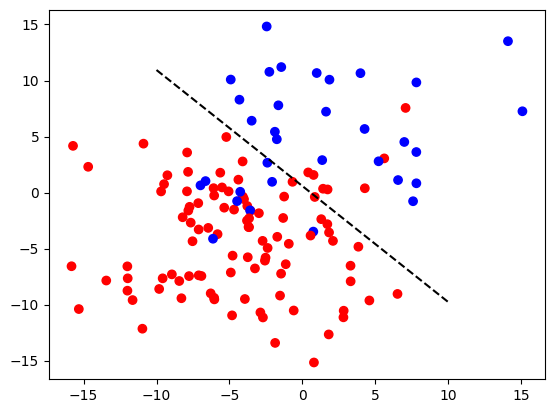

Epoch 20, Loss: 16


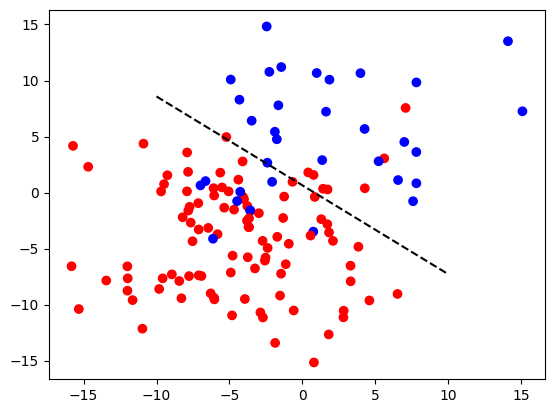

Epoch 21, Loss: 16


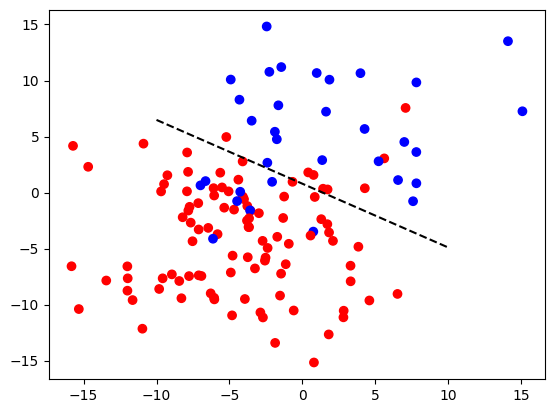

Epoch 22, Loss: 18


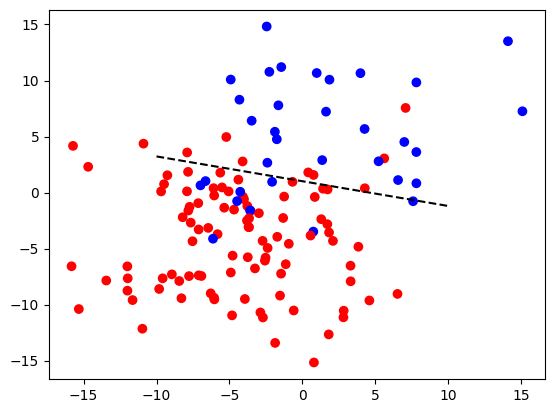

Epoch 23, Loss: 18


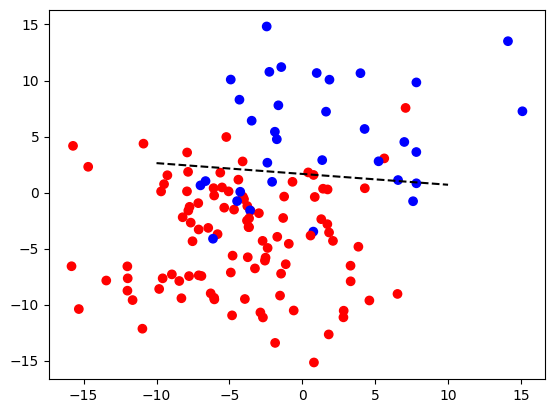

Epoch 24, Loss: 16


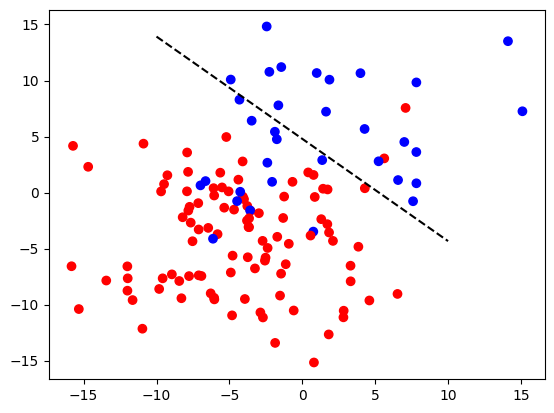

Epoch 25, Loss: 54


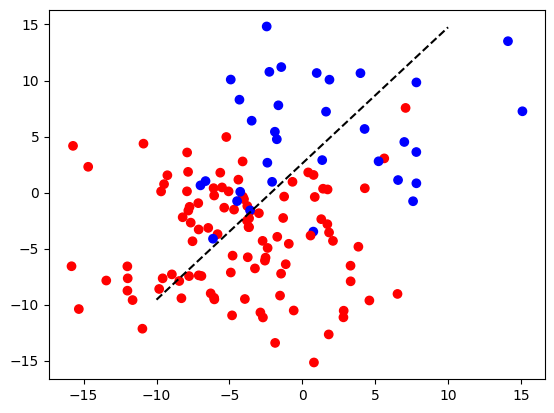

Epoch 26, Loss: 23


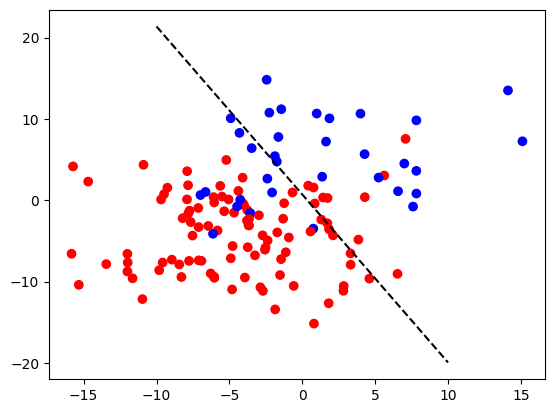

Epoch 27, Loss: 17


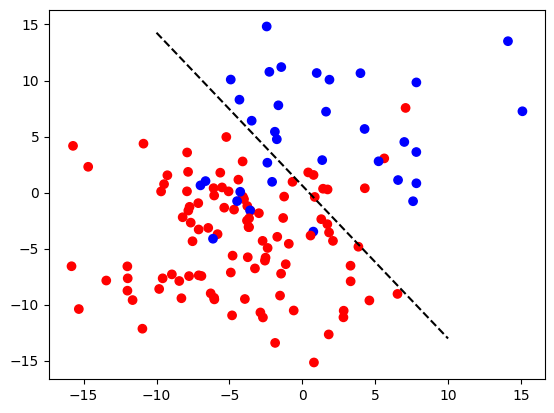

Epoch 28, Loss: 16


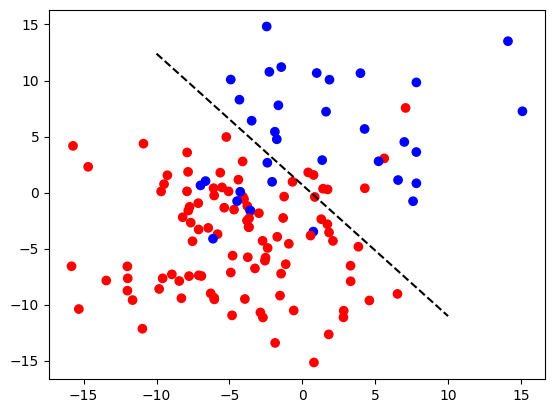

Epoch 29, Loss: 16


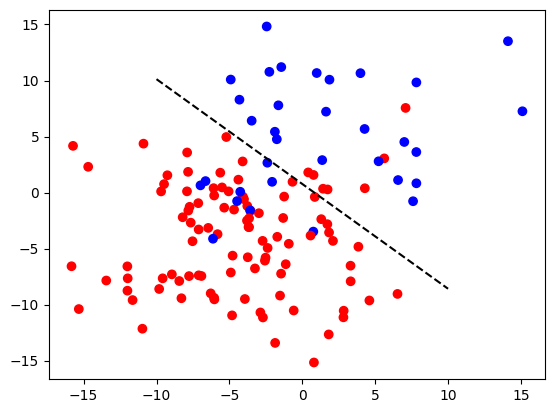

Epoch 30, Loss: 16


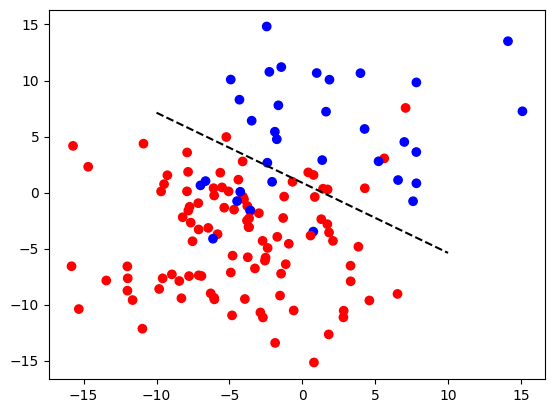

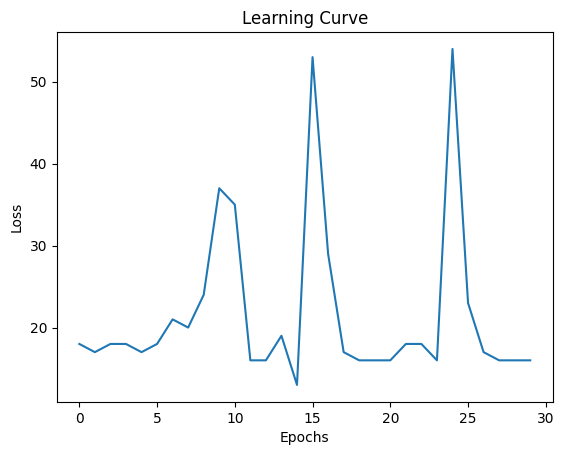

In [70]:
slp12 = SingleLayerPerceptron(2)
X1 = np.array([point[0] for point in point_1])
y1 = np.array([point[1] for point in point_1])
slp12.train(X1, y1, lr=0.03, method="perceptron", epochs=30, visualize=True)

slp22 = SingleLayerPerceptron(2)
X2 = np.array([point[0] for point in point_2])
y2 = np.array([point[1] for point in point_2])
slp22.train(X2, y2, lr=0.03, method="perceptron", epochs=30, visualize=True)

slp32 = SingleLayerPerceptron(2)
X3 = np.array([point[0] for point in point_3])
y3 = np.array([point[1] for point in point_3])
slp32.train(X3, y3, lr=0.03, method="perceptron", epochs=30, visualize=True)

slp42 = SingleLayerPerceptron(2)
X4 = np.array([point[0] for point in point_4])
y4 = np.array([point[1] for point in point_4])
slp42.train(X4, y4, lr=0.03, method="perceptron", epochs=30, visualize=True)